<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥IMPORTING LIBRARIES🔥🔥 </div>

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import warnings
import os
import seaborn as sns
from sklearn.metrics import silhouette_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", module='seaborn')
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pfa-dataset/test.xlsx
/kaggle/input/pfa-dataset/train.xlsx


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥TRAIN - TEST SAMPLE DATA🔥🔥 </div>

In [2]:
train_data = pd.read_excel("/kaggle/input/pfa-dataset/train.xlsx")

In [3]:
train_data.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

In [4]:
test_data = pd.read_excel("/kaggle/input/pfa-dataset/test.xlsx")

In [5]:
test_data.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥STATSICAL DESCRIPTION OF TRAIN DATA🔥🔥 </div>

In [6]:
train_data.describe().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥NULL VALUE CHECKING🔥🔥 </div>

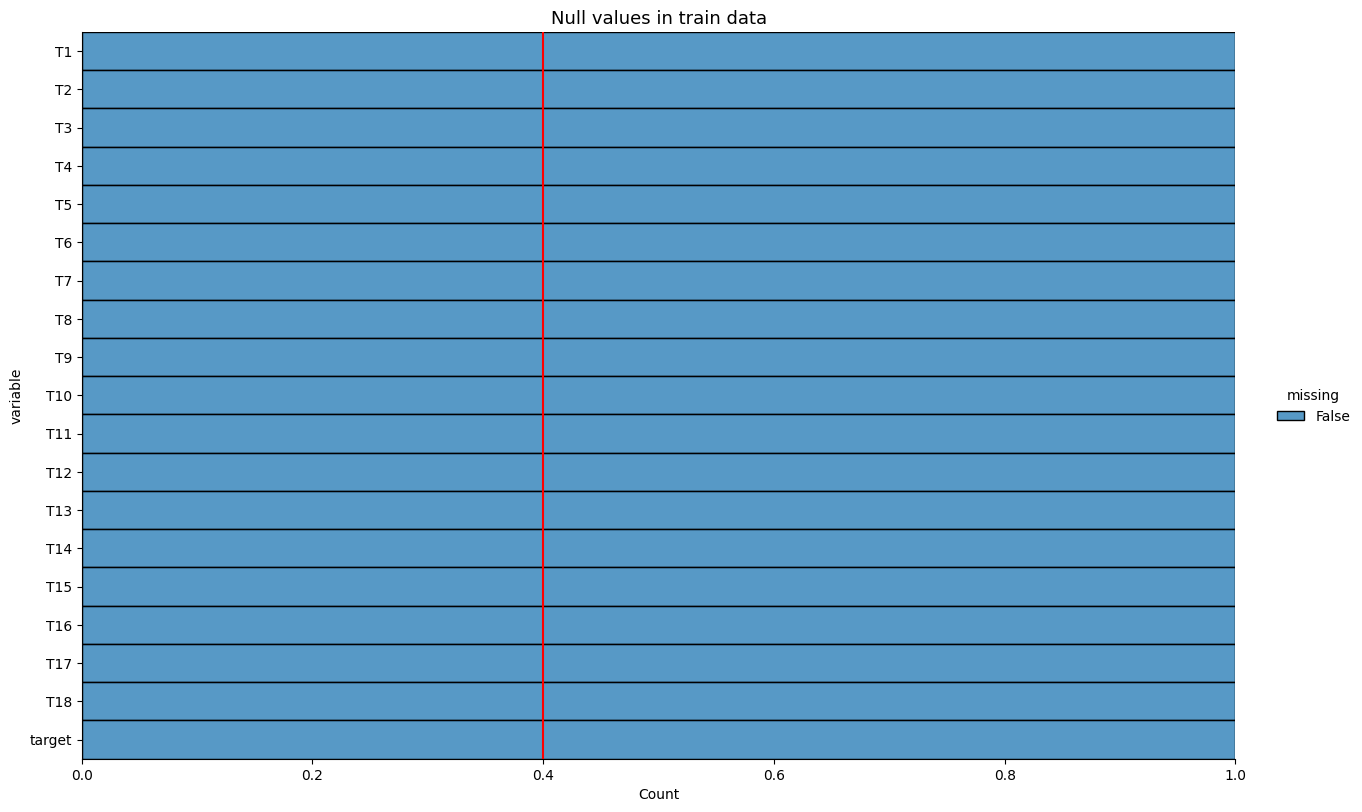

In [7]:
sns.displot(data=train_data.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

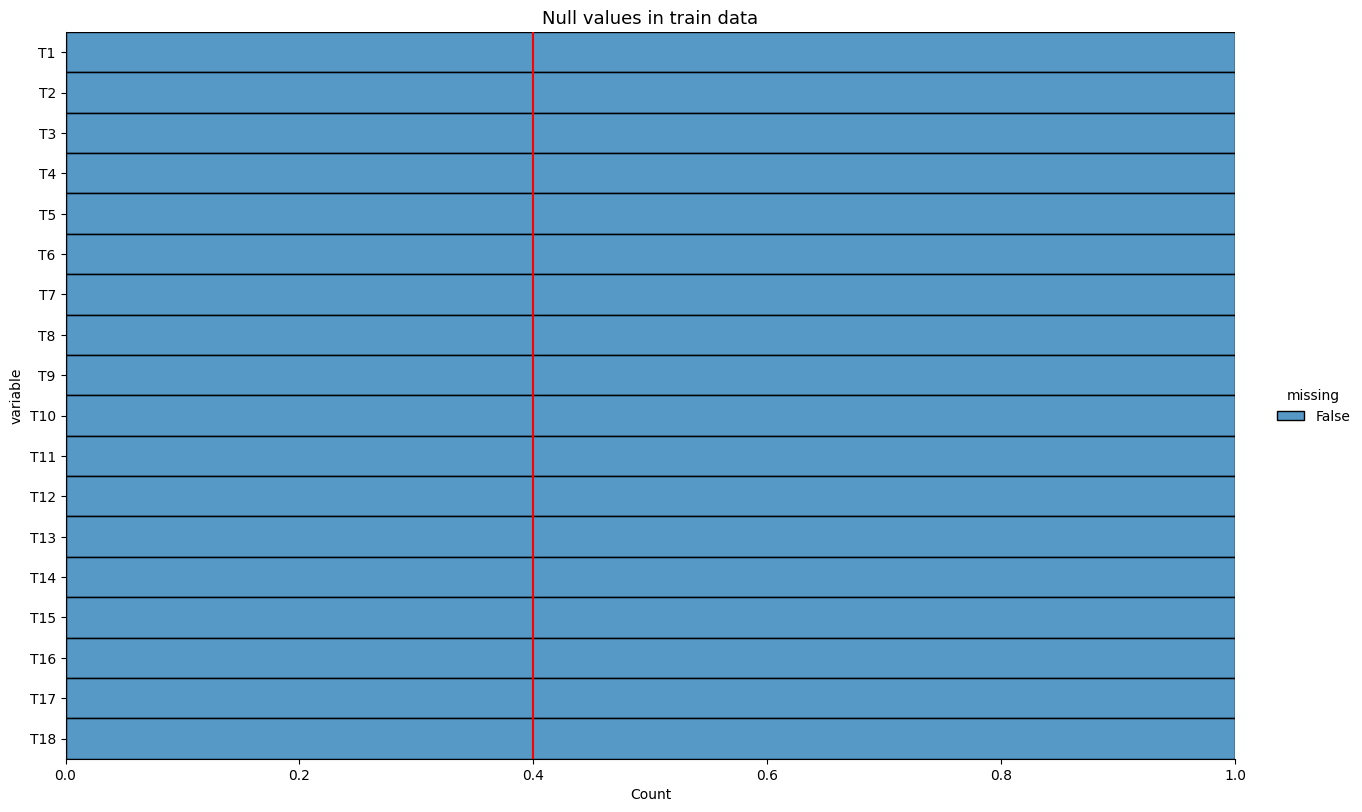

In [8]:
sns.displot(data=test_data.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

In [9]:
def null_check(data):
    null = data.isnull().sum().sum()
    print("Total null value is: ",null)

In [10]:
null_check(train_data)
null_check(test_data)

Total null value is:  0
Total null value is:  0


In [11]:
print("Shape of train data is: ",train_data.shape)
print("Shape of test data is: ",test_data.shape)

Shape of train data is:  (36752, 19)
Shape of test data is:  (15752, 18)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥DATA DUPLICATE CHECKING🔥🔥 </div>

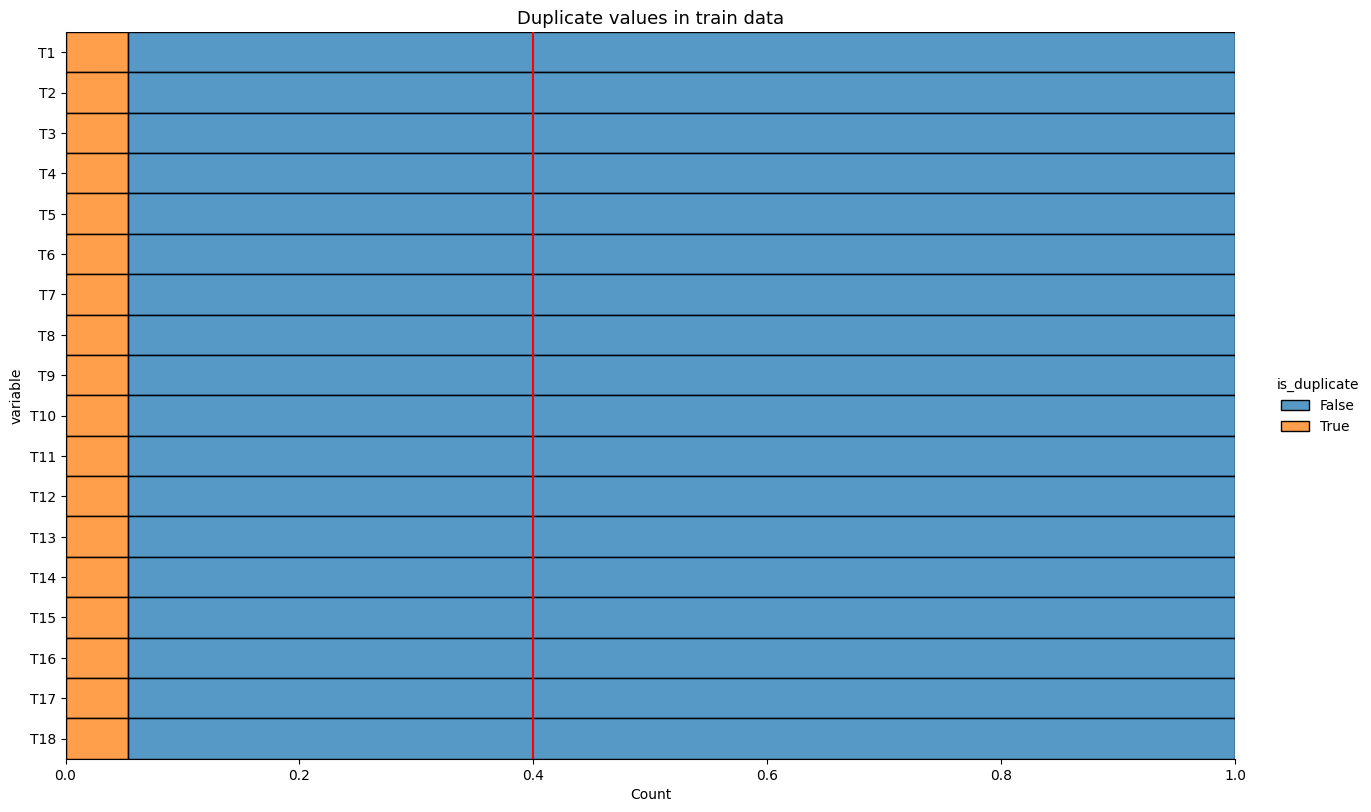

In [12]:
duplicates = train_data.duplicated(keep=False)

duplicate_data = test_data.copy()
duplicate_data['is_duplicate'] = duplicates

sns.displot(data=duplicate_data.melt(id_vars='is_duplicate', value_name='value'),
            y='variable',
            hue='is_duplicate',
            multiple='fill',
            height=8,
            aspect=1.6)
plt.axvline(0.4, color='r')
plt.title("Duplicate values in train data", fontsize=13)
plt.show()

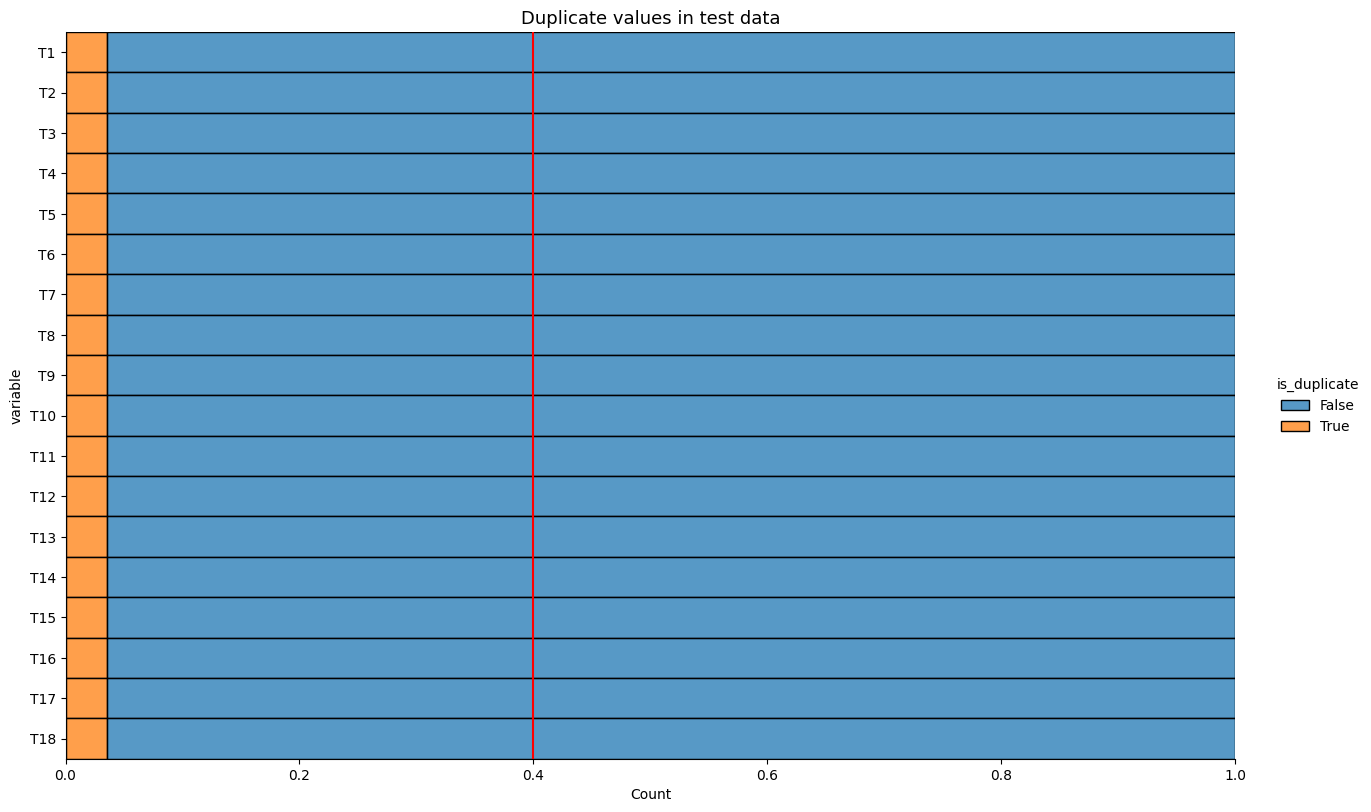

In [13]:
duplicates = test_data.duplicated(keep=False)

duplicate_data = test_data.copy()
duplicate_data['is_duplicate'] = duplicates

sns.displot(data=duplicate_data.melt(id_vars='is_duplicate', value_name='value'),
            y='variable',
            hue='is_duplicate',
            multiple='fill',
            height=8,
            aspect=1.6)
plt.axvline(0.4, color='r')
plt.title("Duplicate values in test data", fontsize=13)
plt.show()

In [14]:
def duplicate_check(data):
    duplicate = data.duplicated().sum()
    print(f'Data have total {duplicate} values')
    if duplicate > 0:
        data = data.drop_duplicates()
    print("Duplicates after droping:",data.duplicated().sum())
    print("==================================================")
    return data

In [15]:
train_data = duplicate_check(train_data)
#test_data = duplicate_check(test_data)

Data have total 1267 values
Duplicates after droping: 0


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥TARGET COLUMN ANALYSIS🔥🔥 </div>

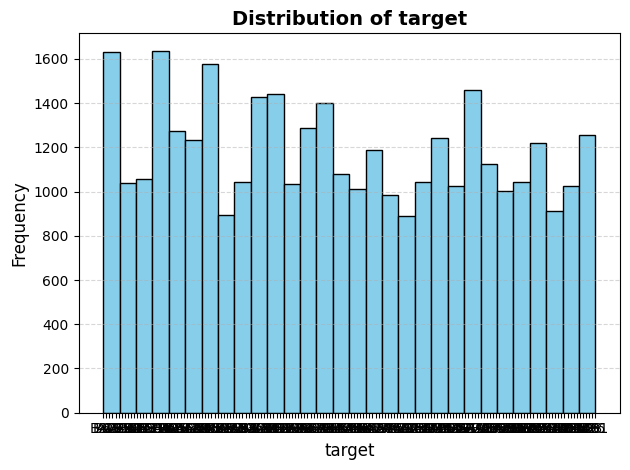

In [16]:
plt.hist(train_data['target'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of target', fontsize=14, fontweight='bold')
plt.xlabel('target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚡CONTINUOUS COLUMN ANALYSIS⚡ </div>

In [17]:
continuous_vars = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [18]:
print("Continuous_vars are: ",continuous_vars)

Continuous_vars are:  ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18']


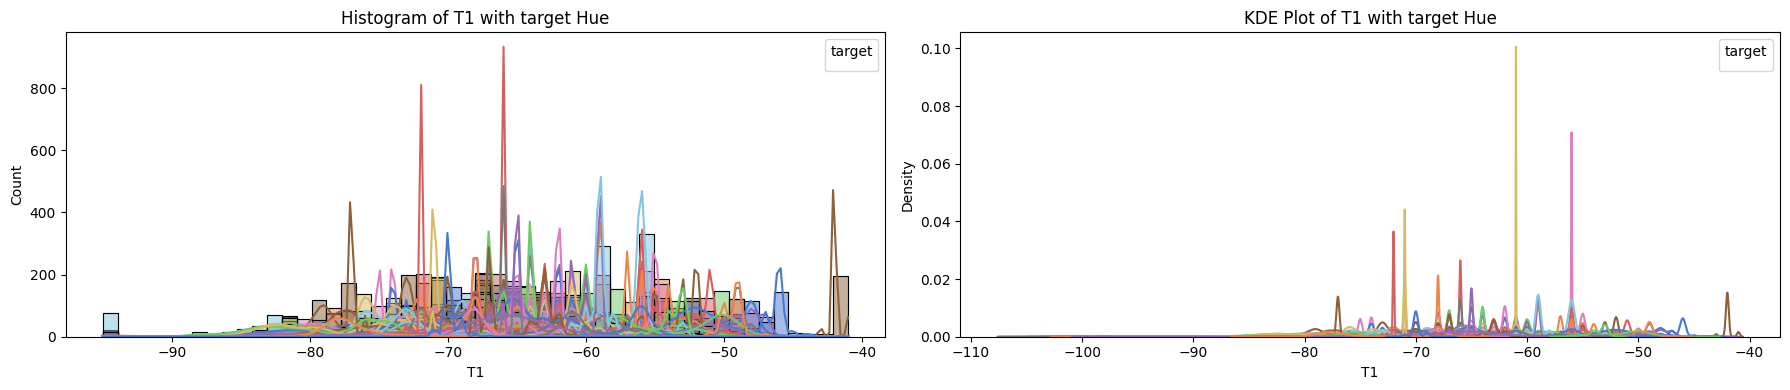

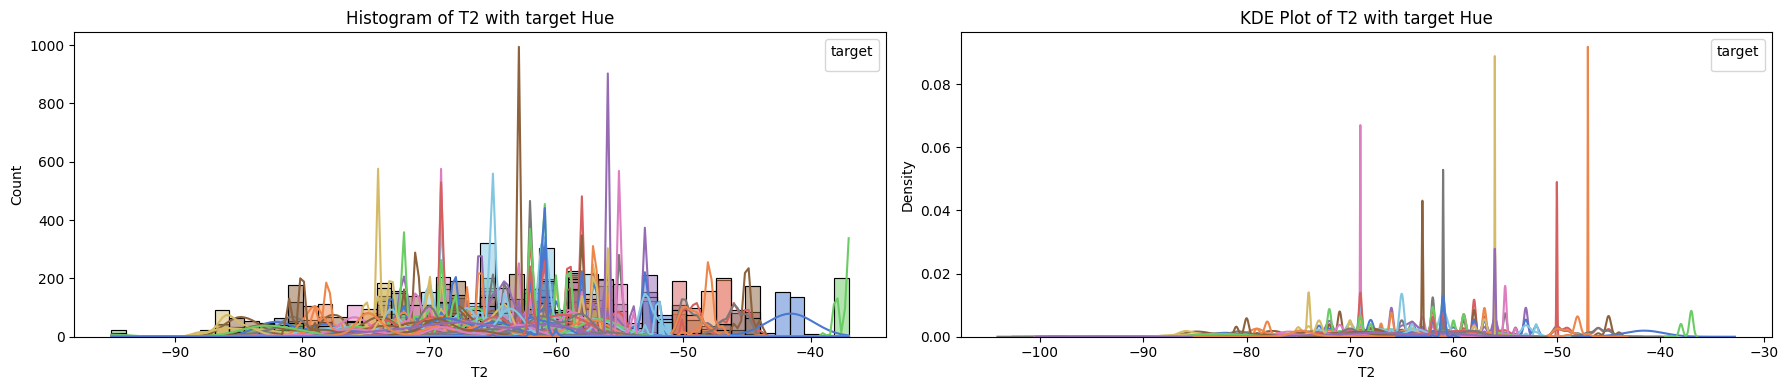

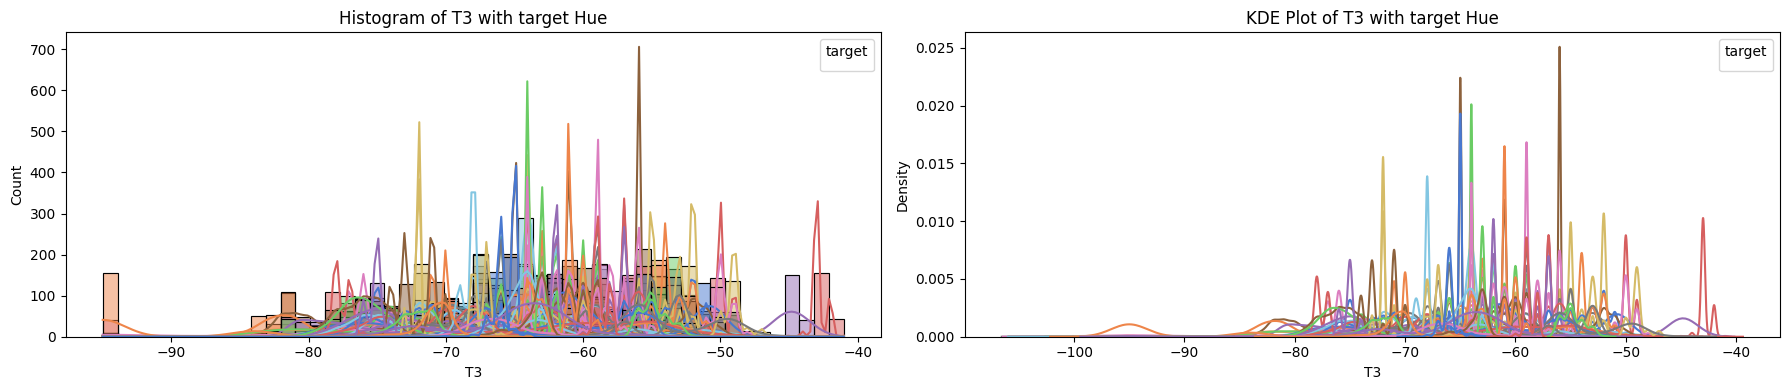

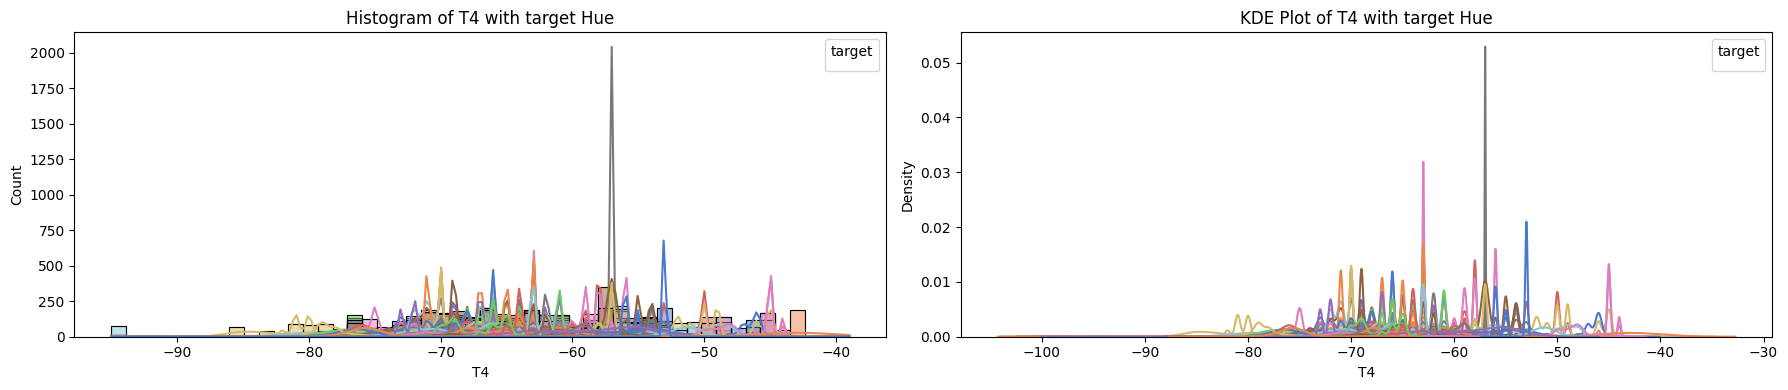

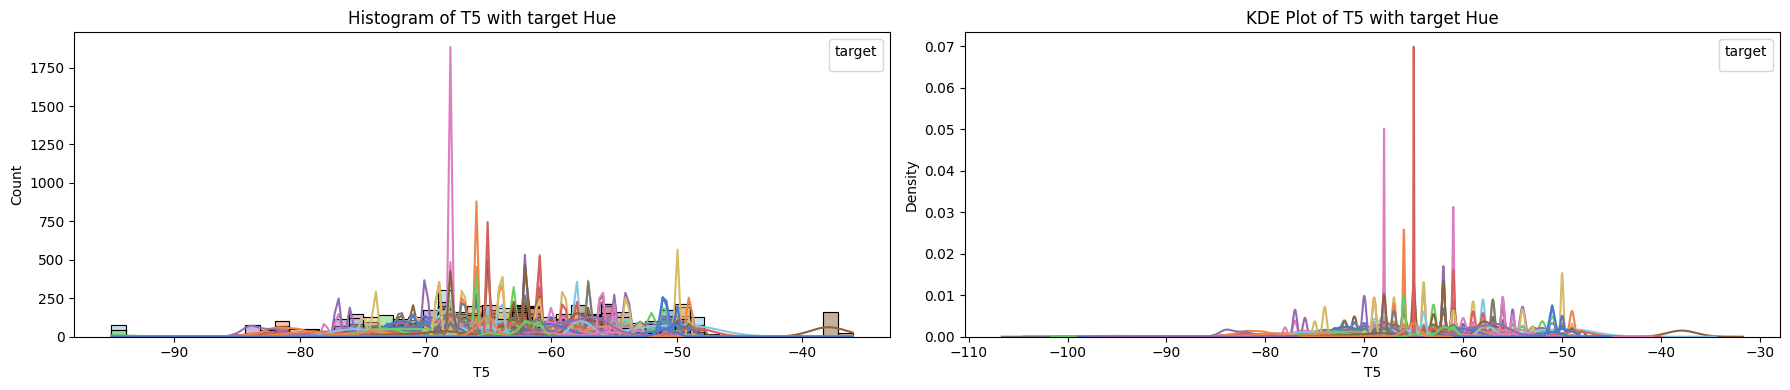

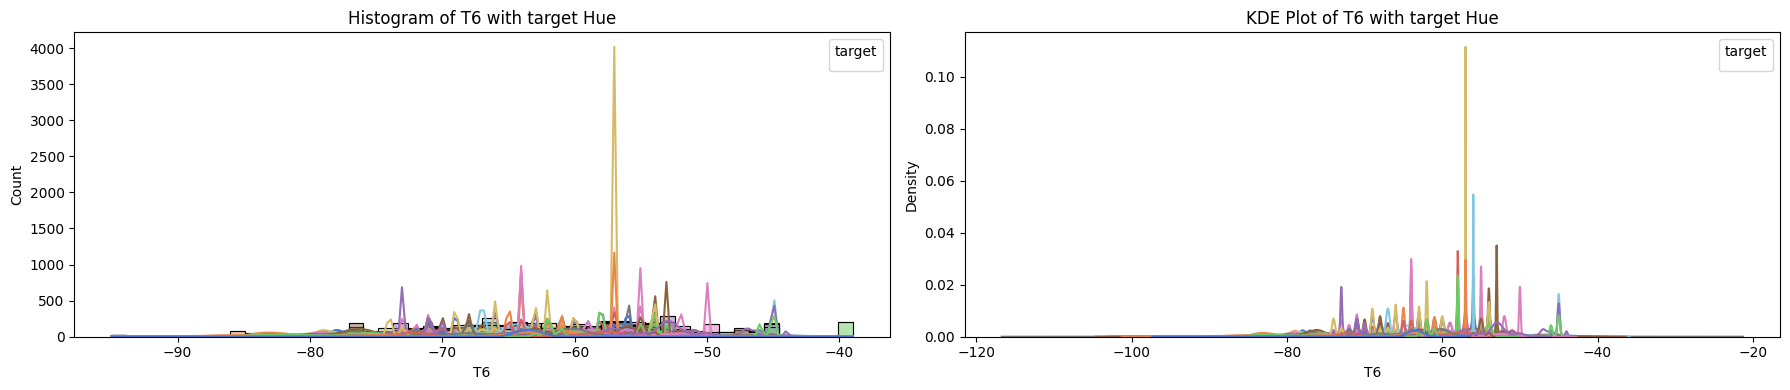

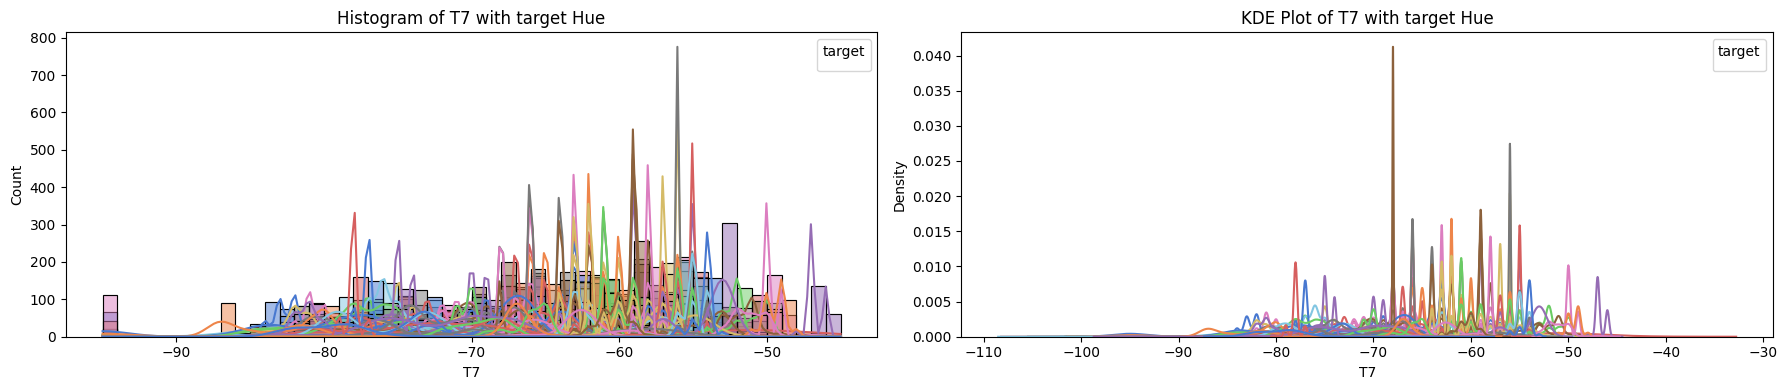

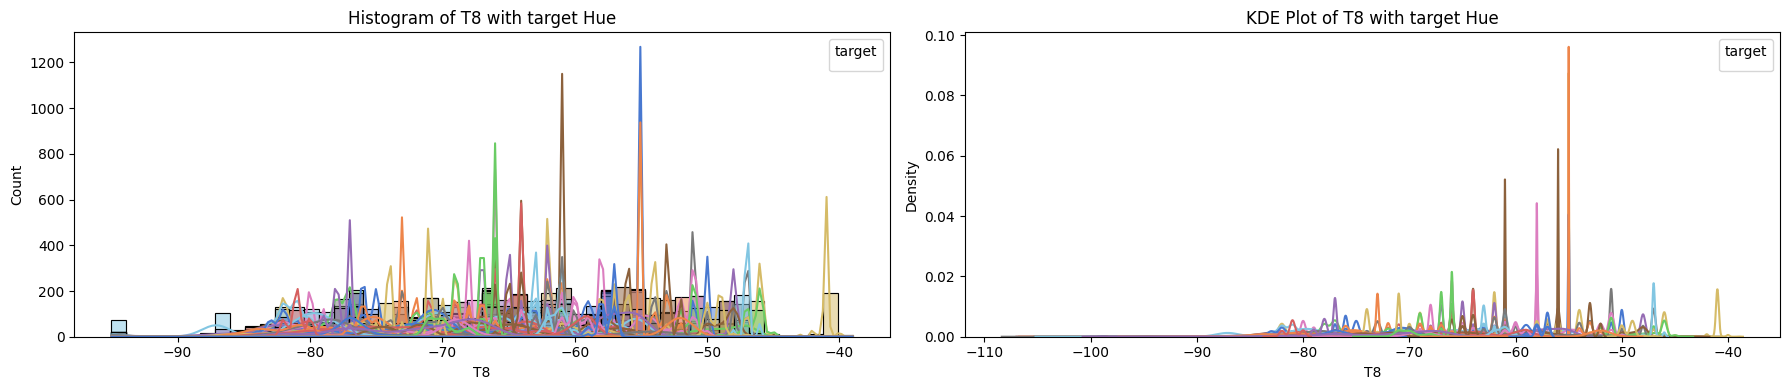

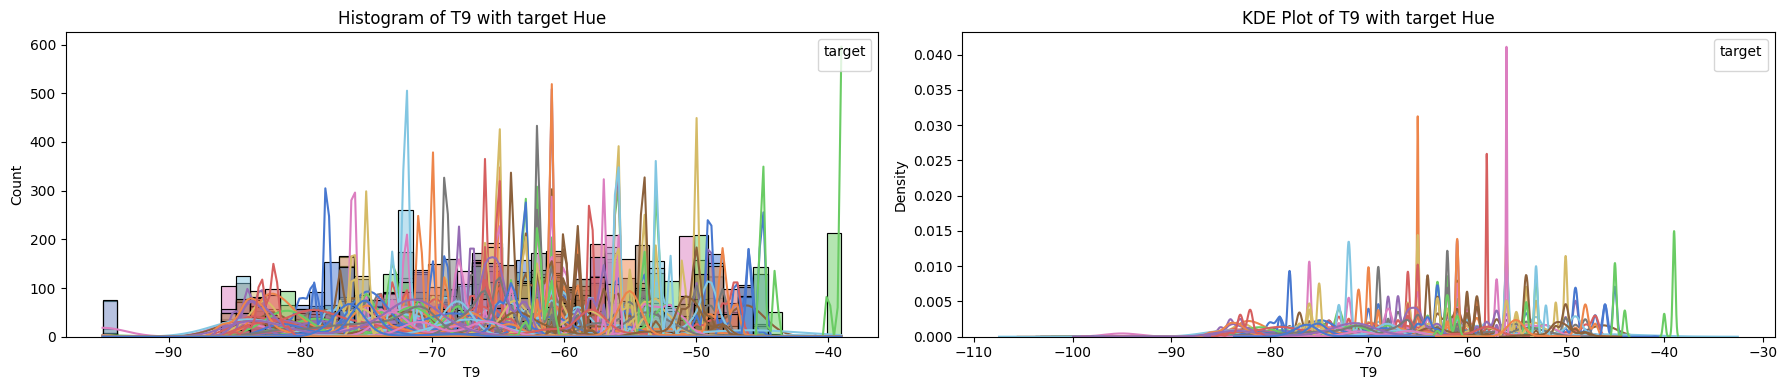

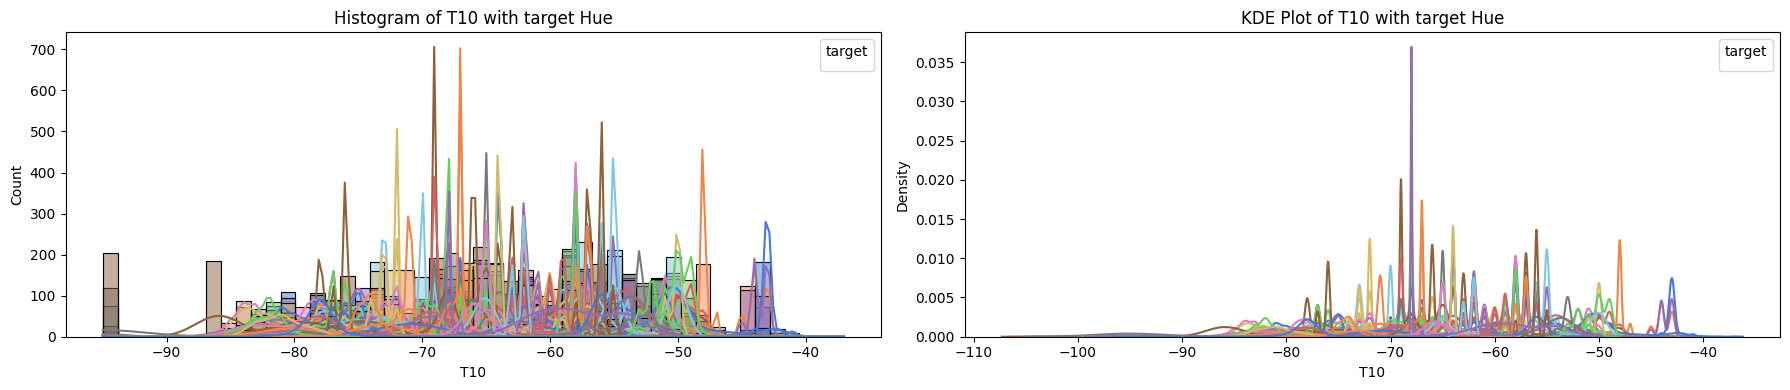

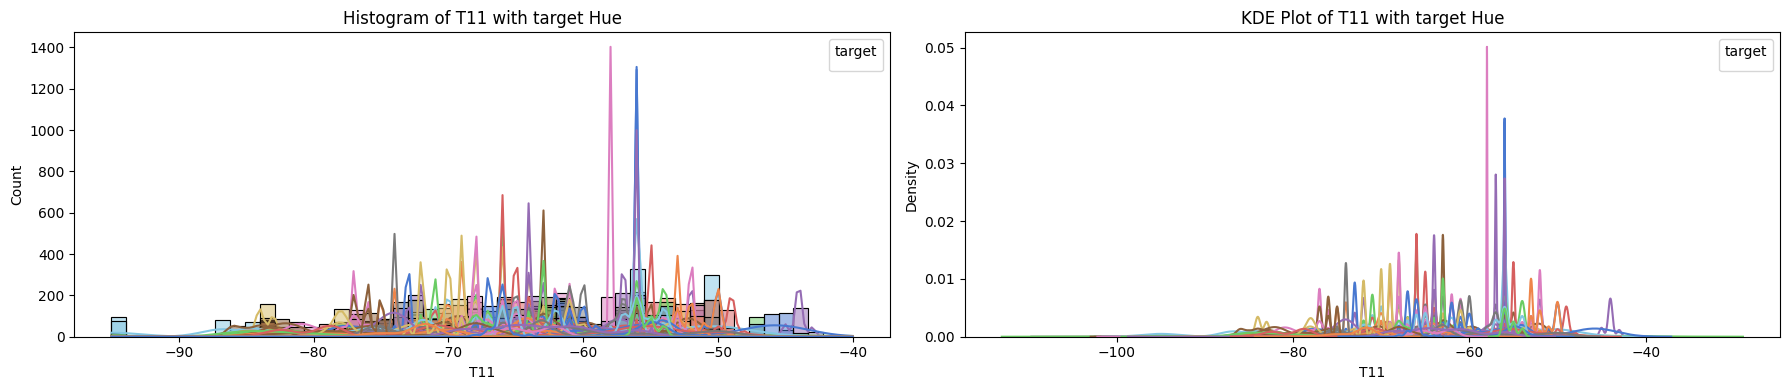

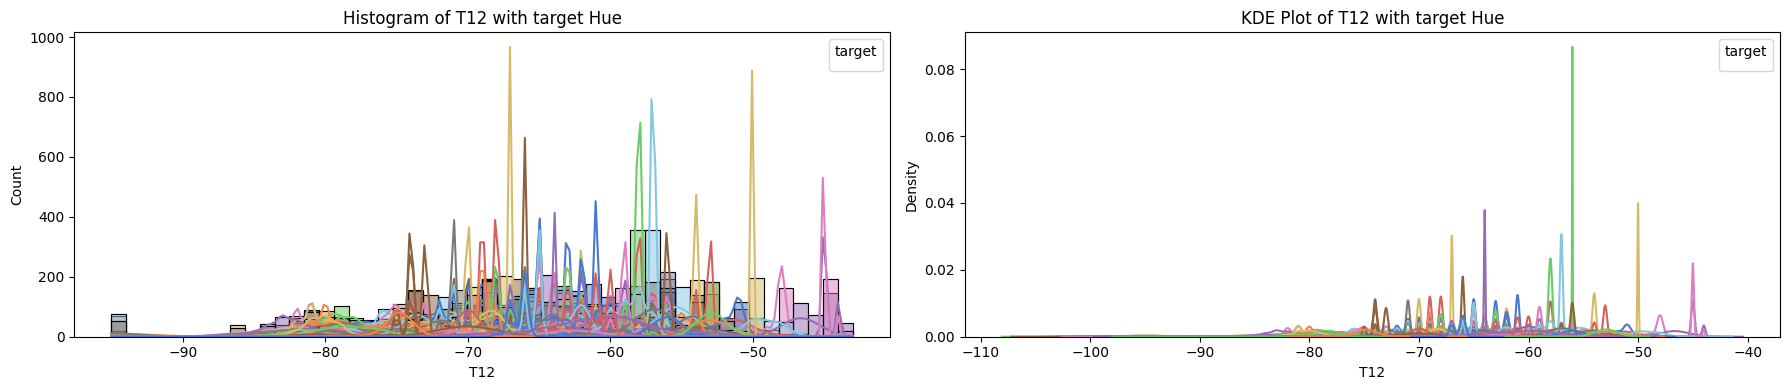

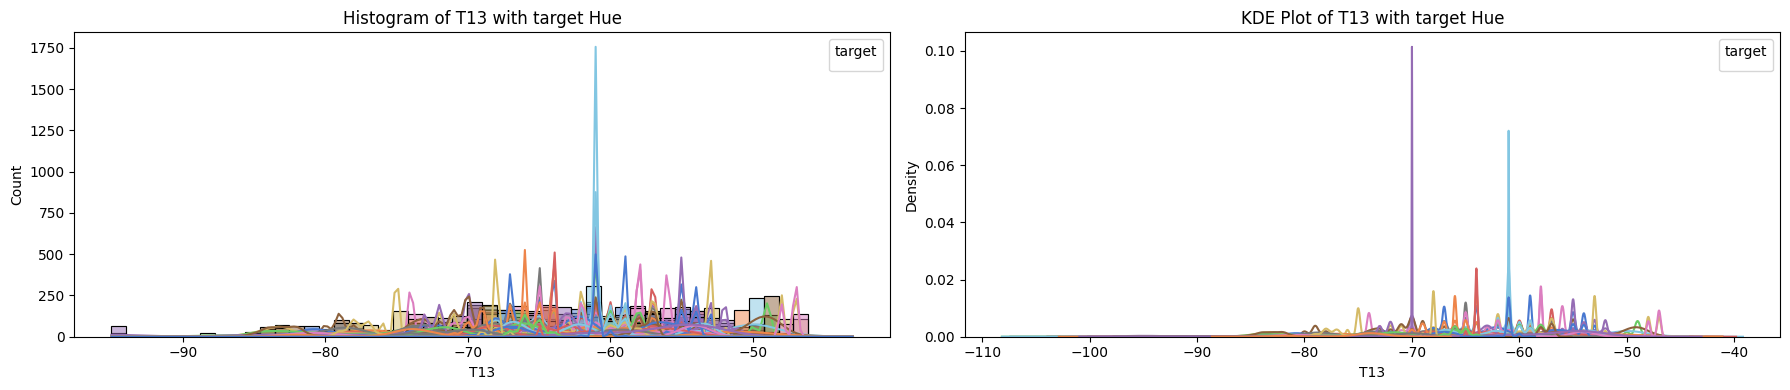

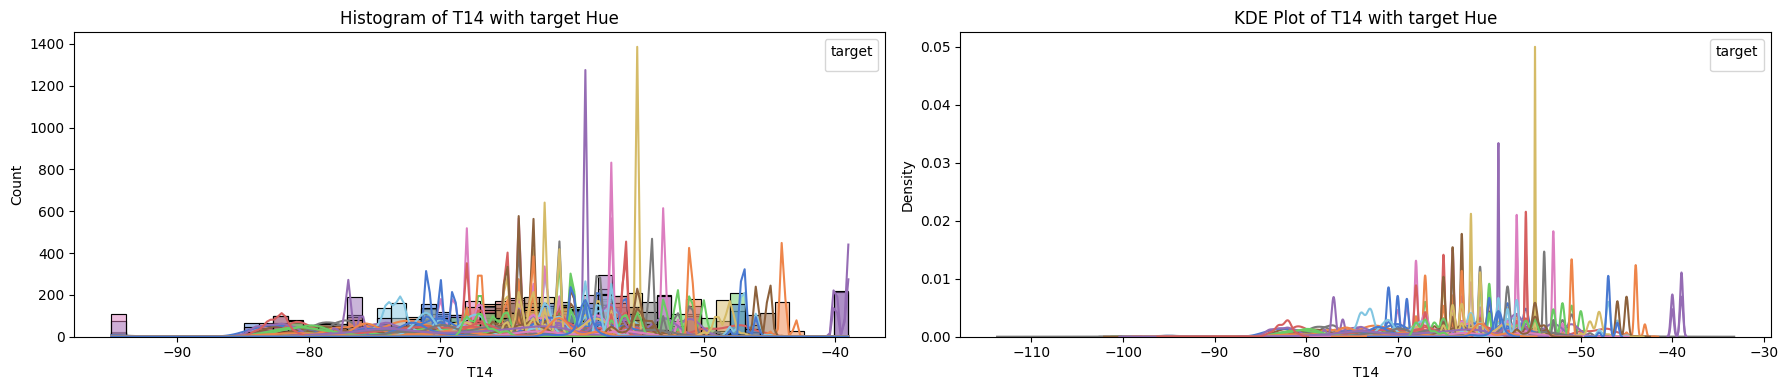

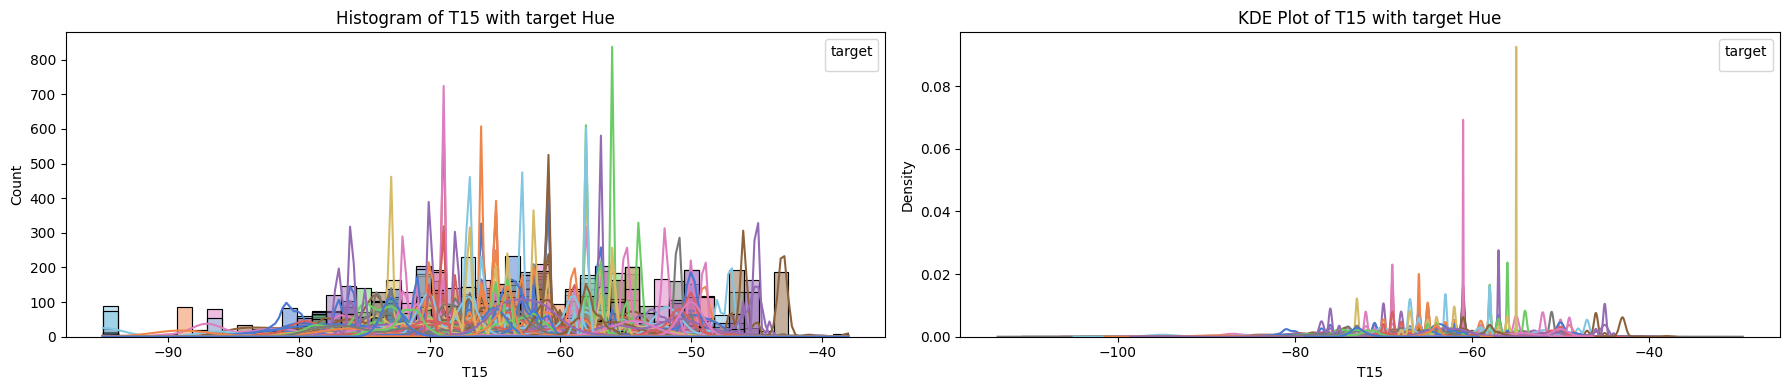

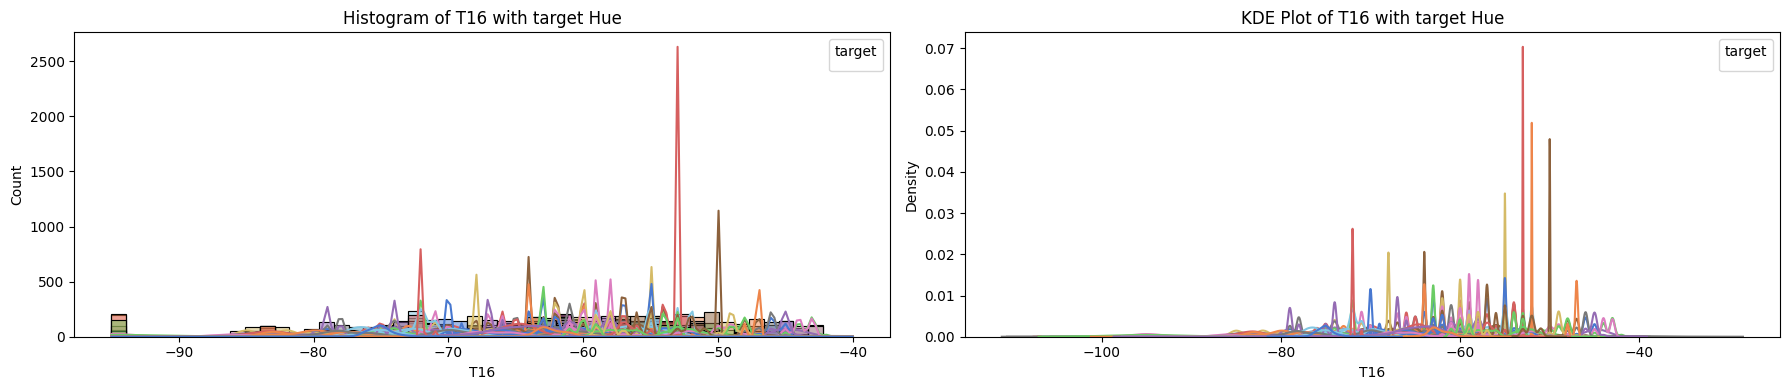

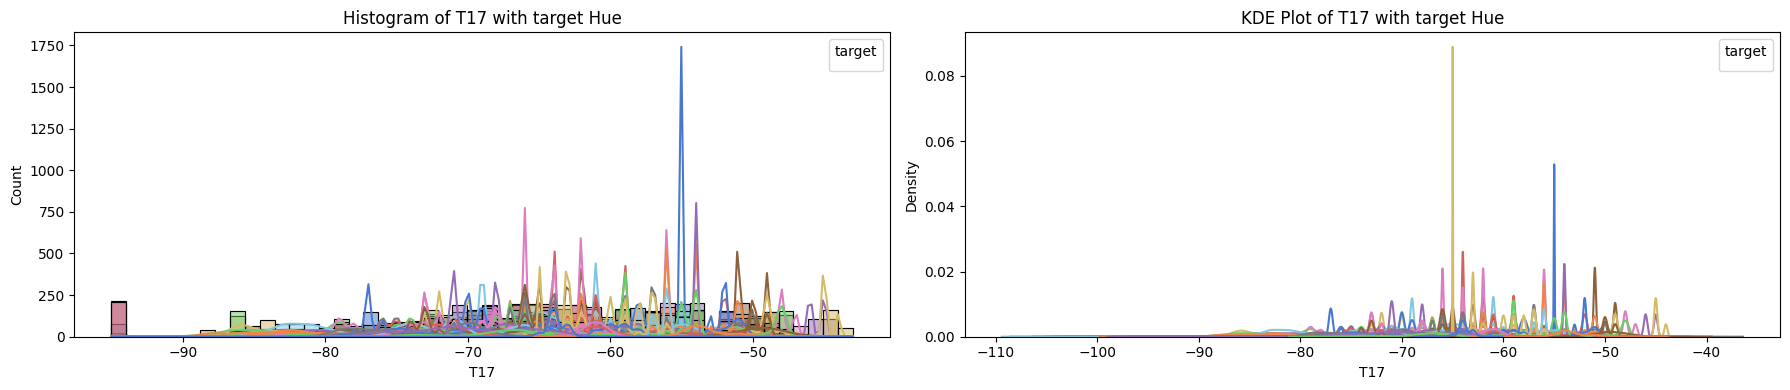

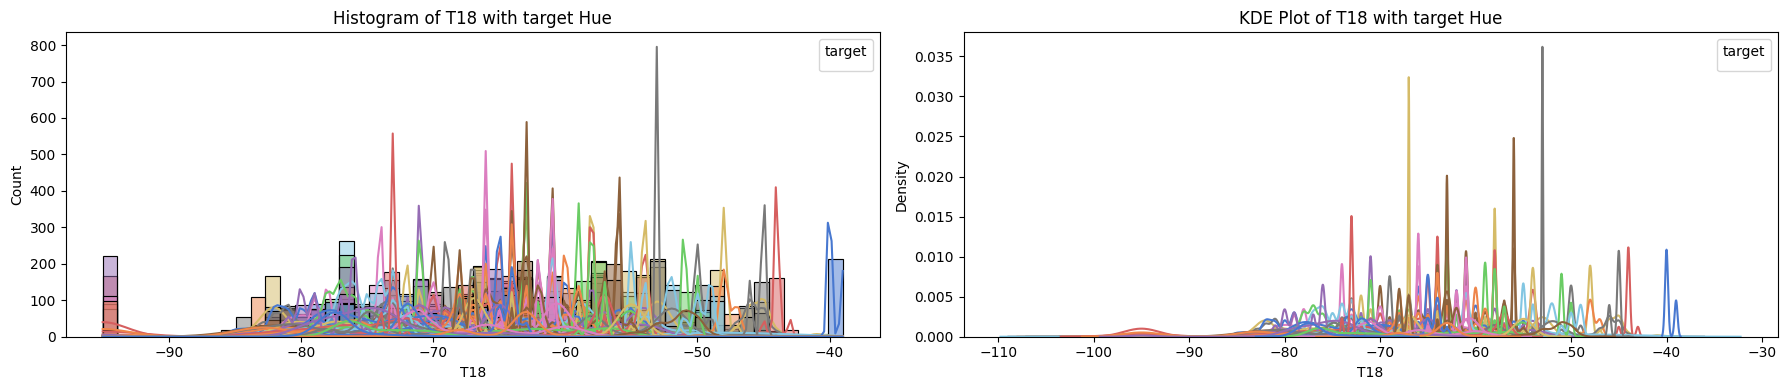

In [19]:
# Set up warnings to be ignored (optional)
warnings.filterwarnings("ignore")
pd.set_option('mode.use_inf_as_na', False)
# Set hue to your target column
target_column = 'target'  # Replace with your actual target column

for column in continuous_vars:
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))  # Create subplots with 1 row and 2 columns
    
    # Plot histogram with hue
    sns.histplot(data=train_data, x=column, hue=target_column, bins=50, kde=True, ax=axes[0], palette='muted')
    axes[0].set_title(f'Histogram of {column} with {target_column} Hue')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].legend(title=target_column, loc='upper right')
    
    # Plot KDE plot with hue
    sns.kdeplot(data=train_data, x=column, hue=target_column, ax=axes[1], palette='muted')
    axes[1].set_title(f'KDE Plot of {column} with {target_column} Hue')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')
    axes[1].legend(title=target_column, loc='upper right')
    
    plt.tight_layout()  
    plt.show()


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✨ANALYSIS BY QQ PLOT✨ </div>

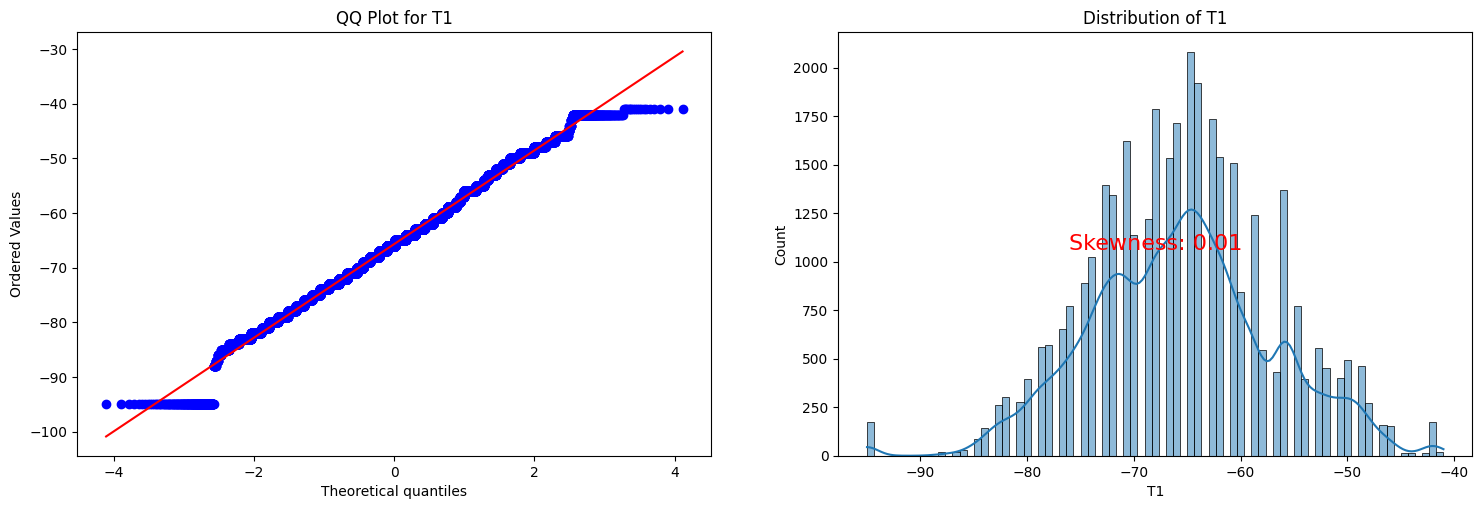

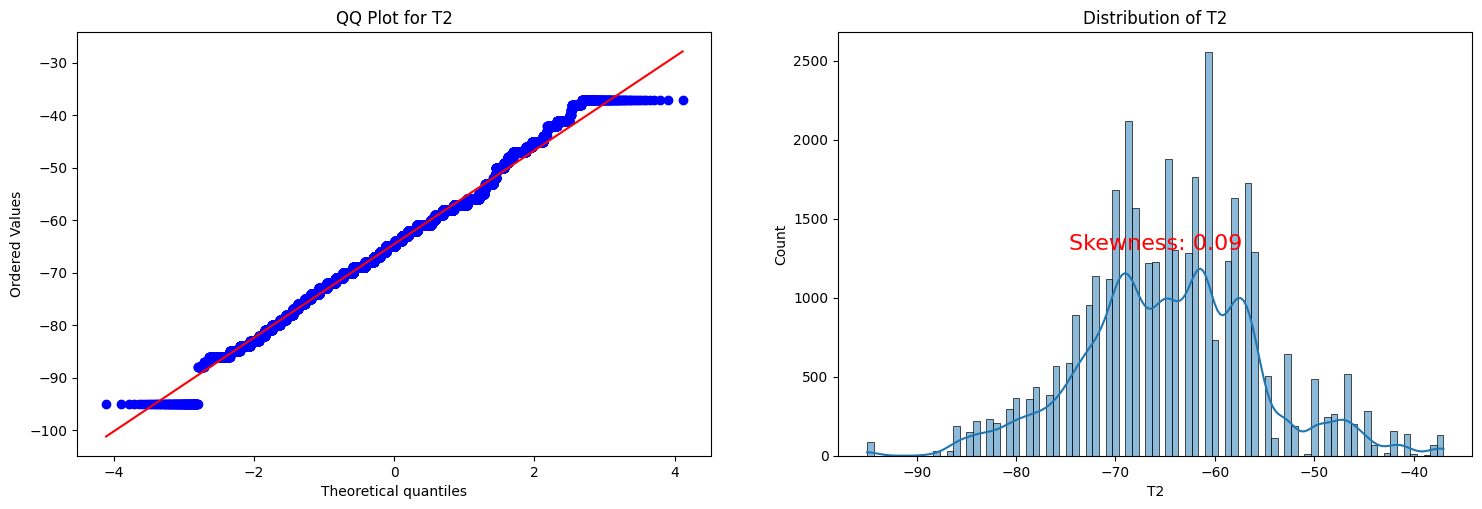

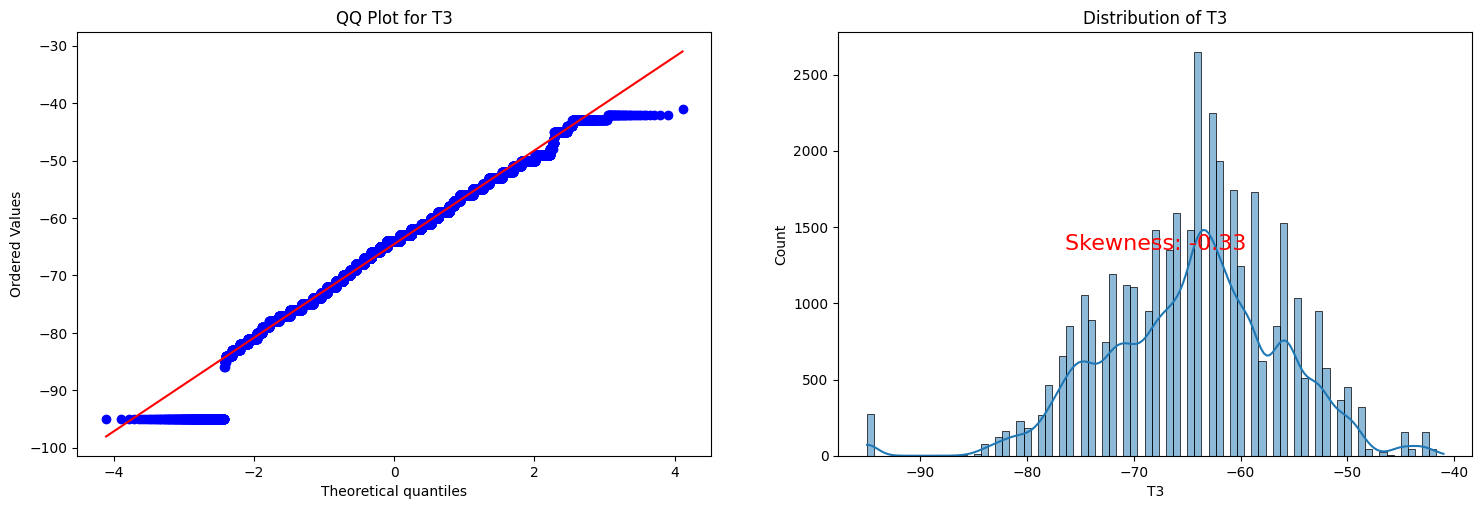

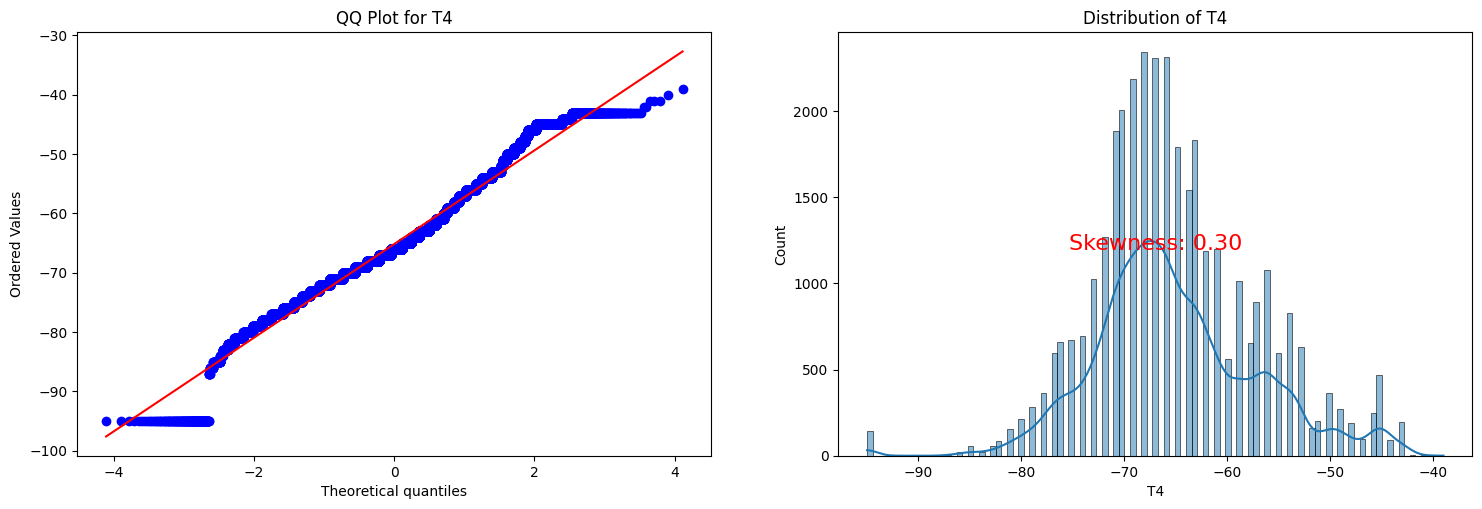

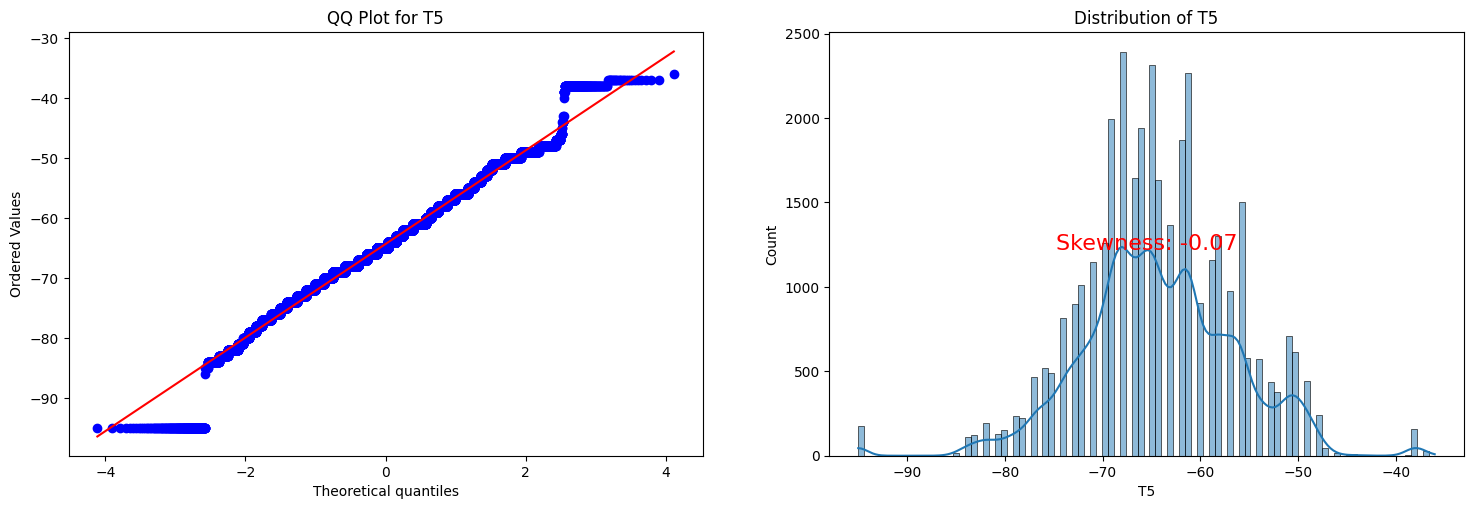

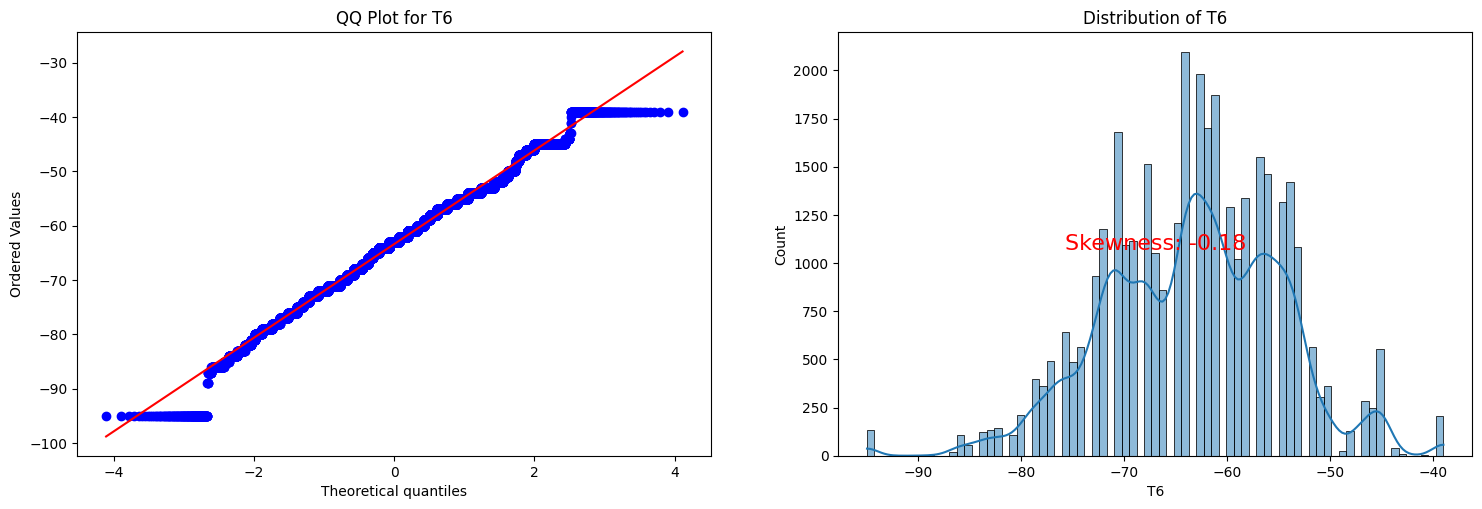

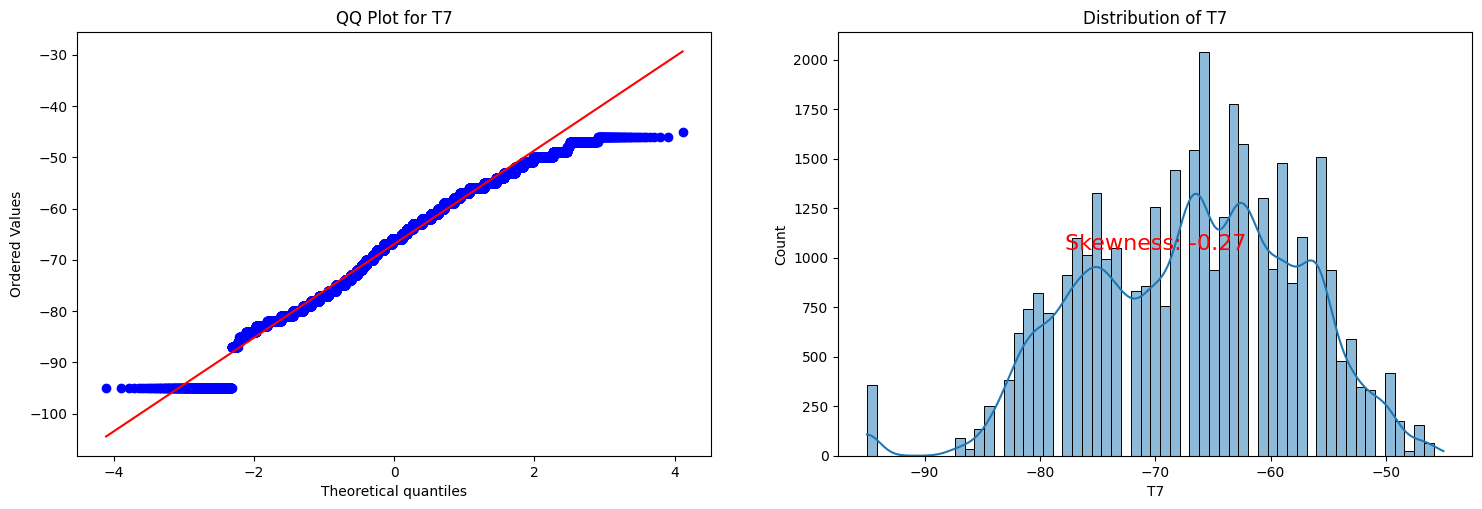

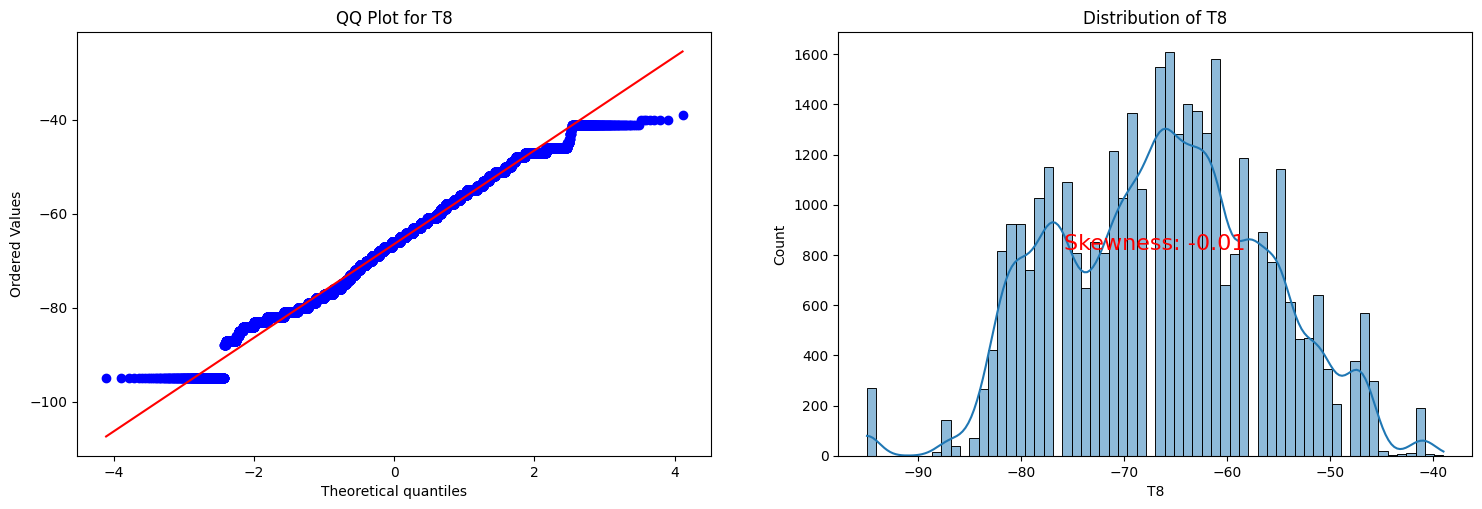

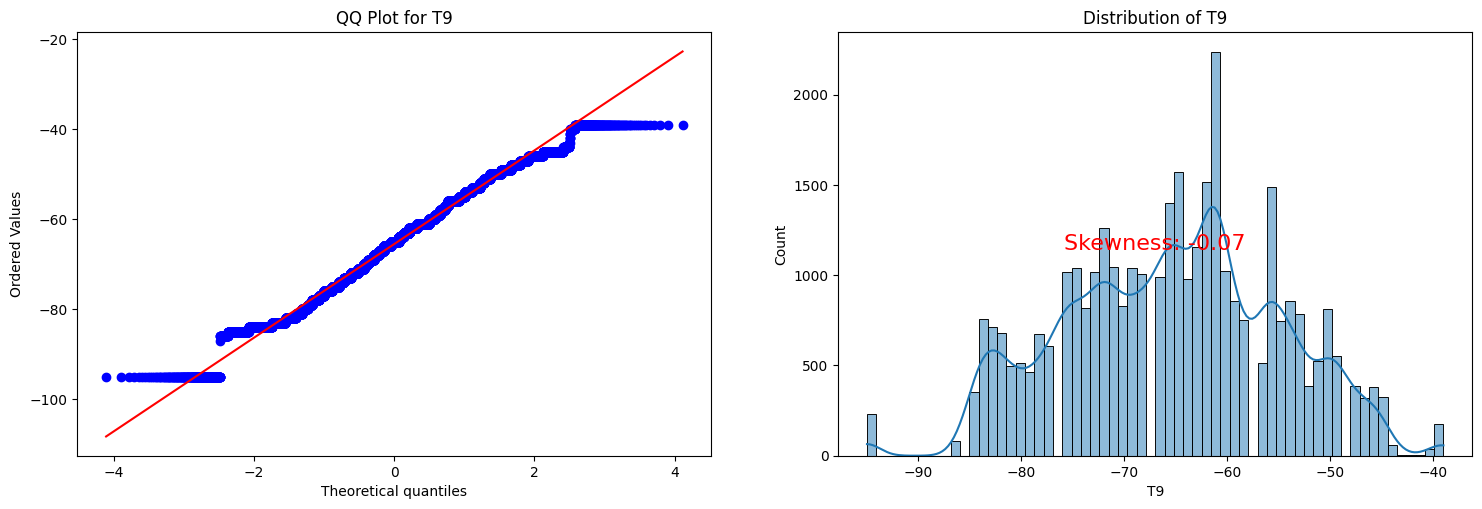

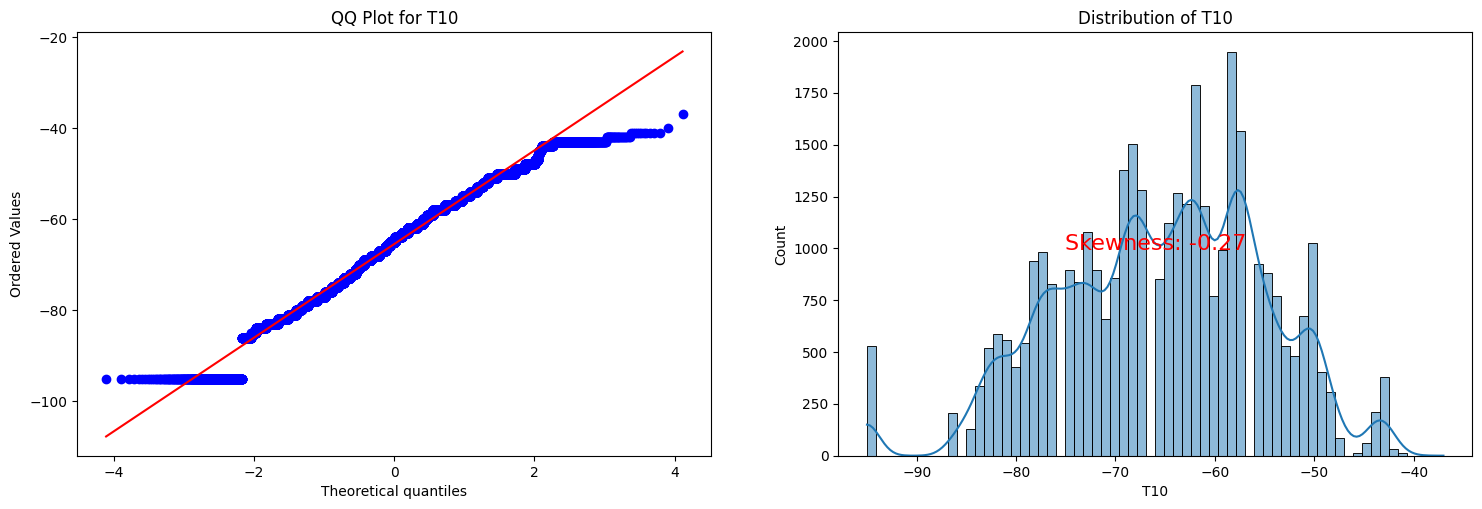

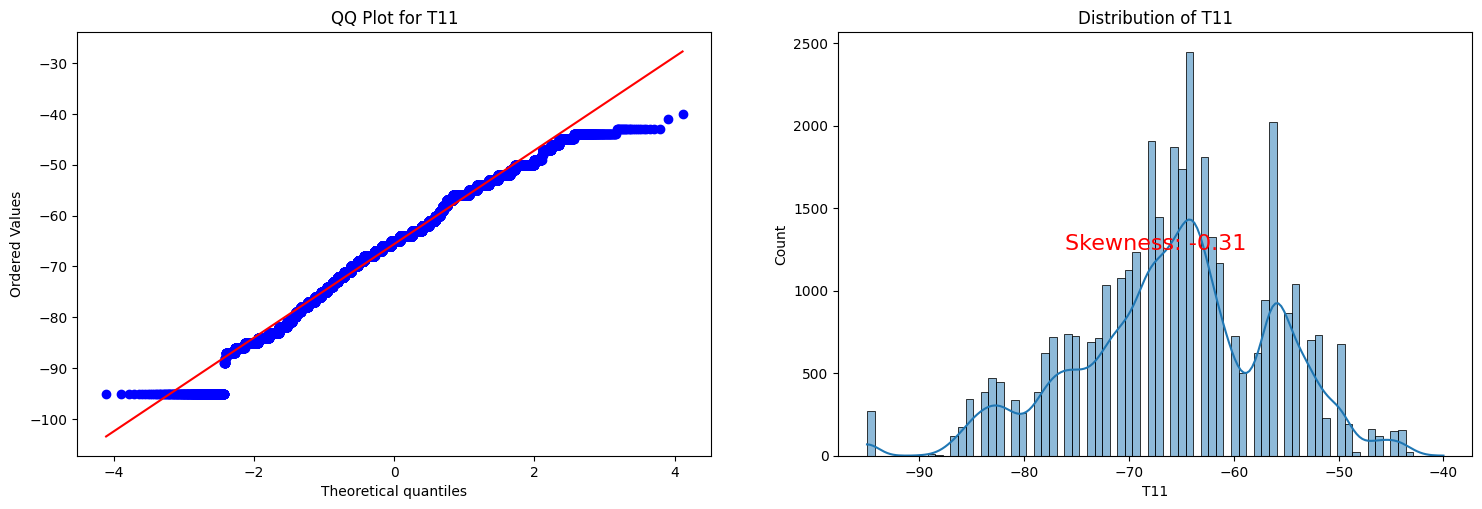

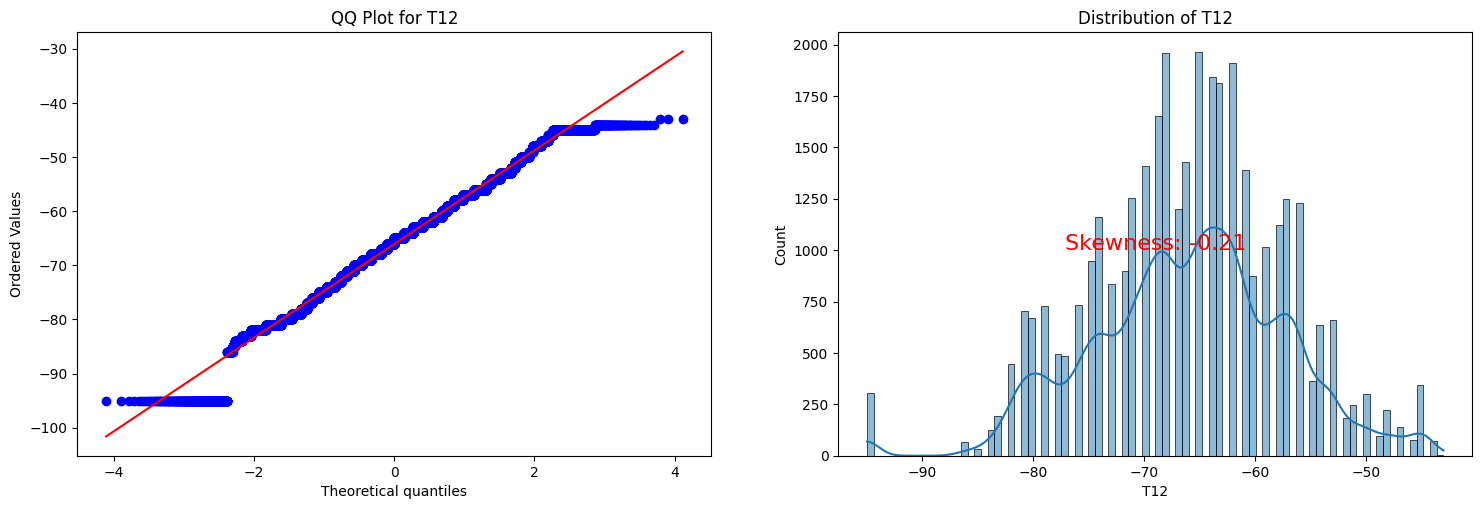

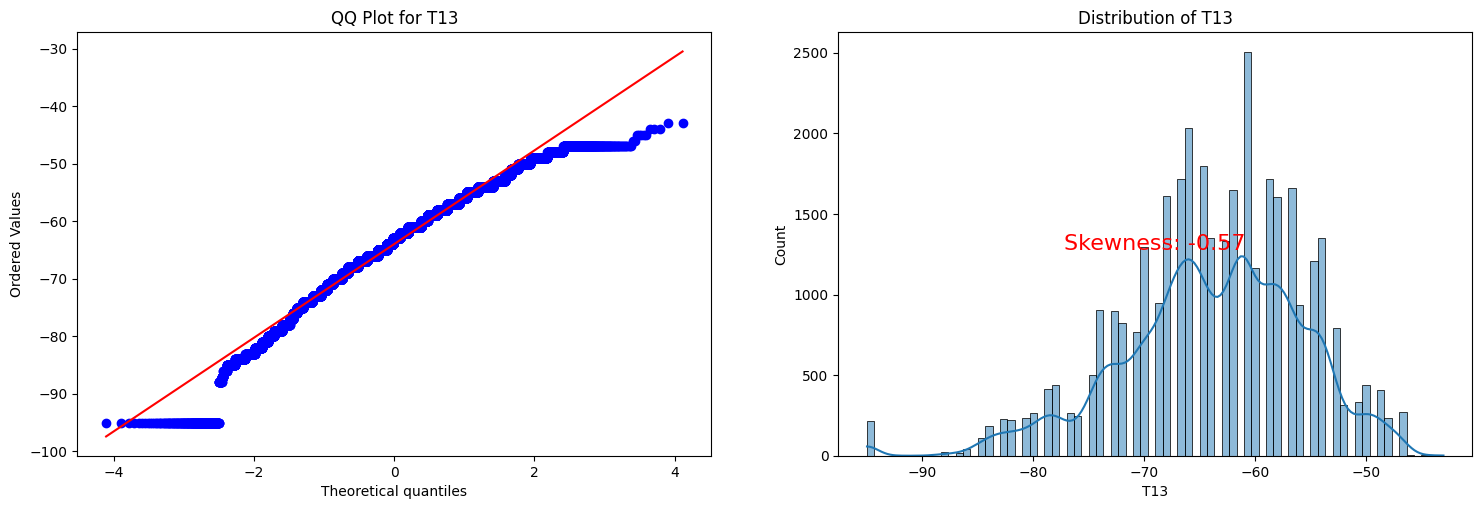

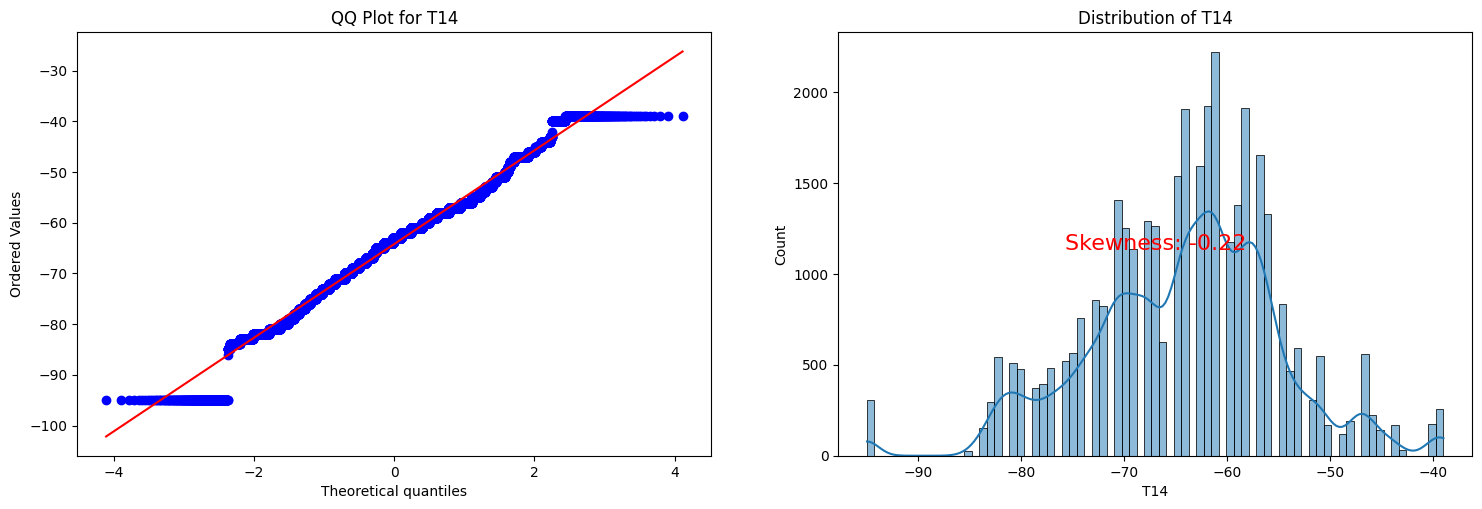

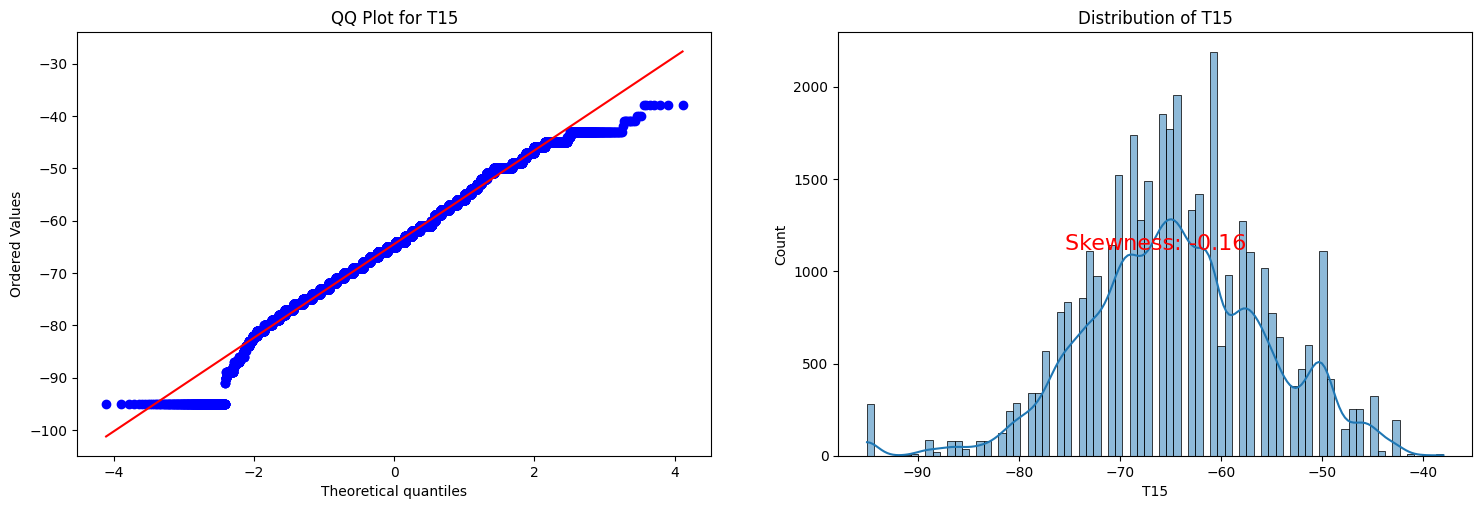

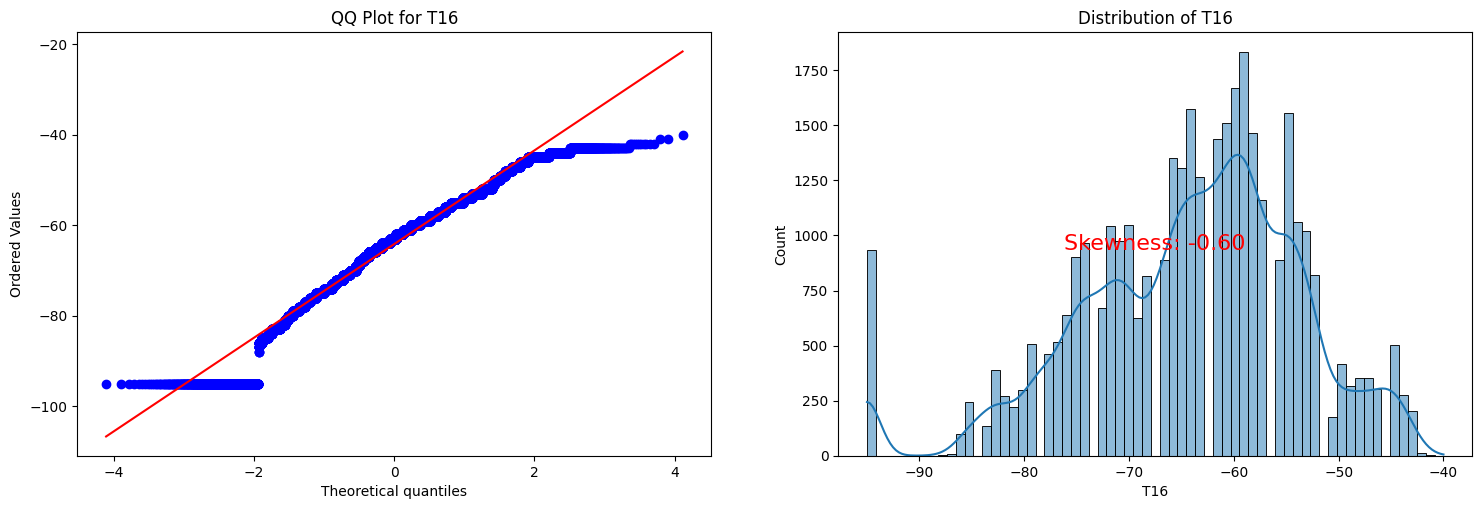

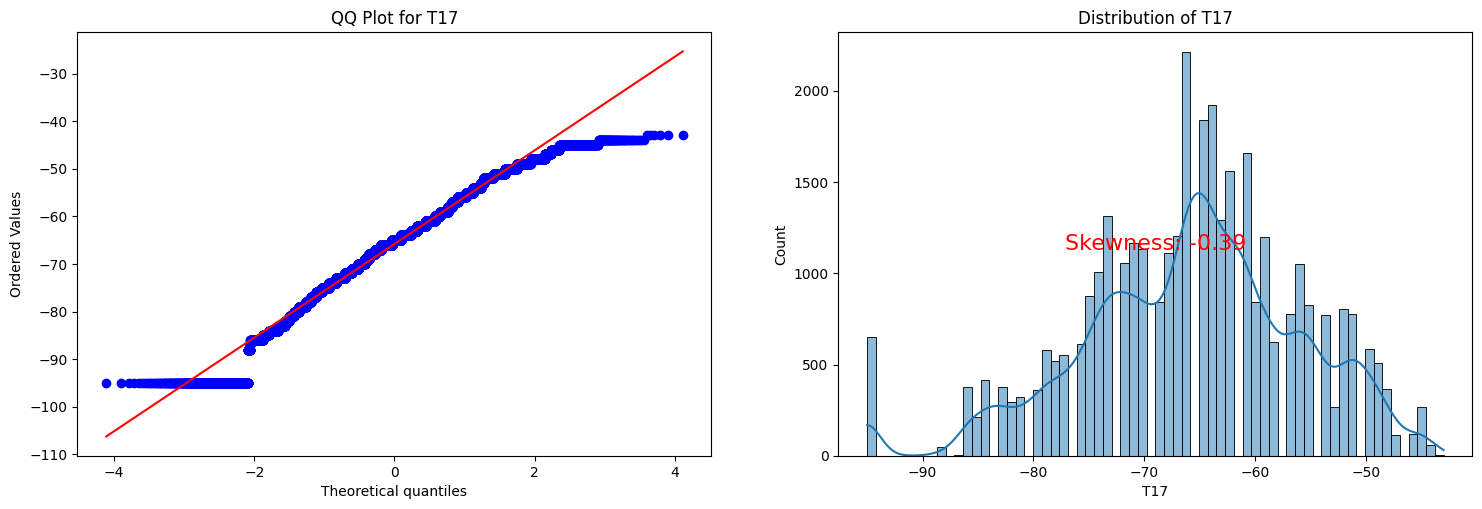

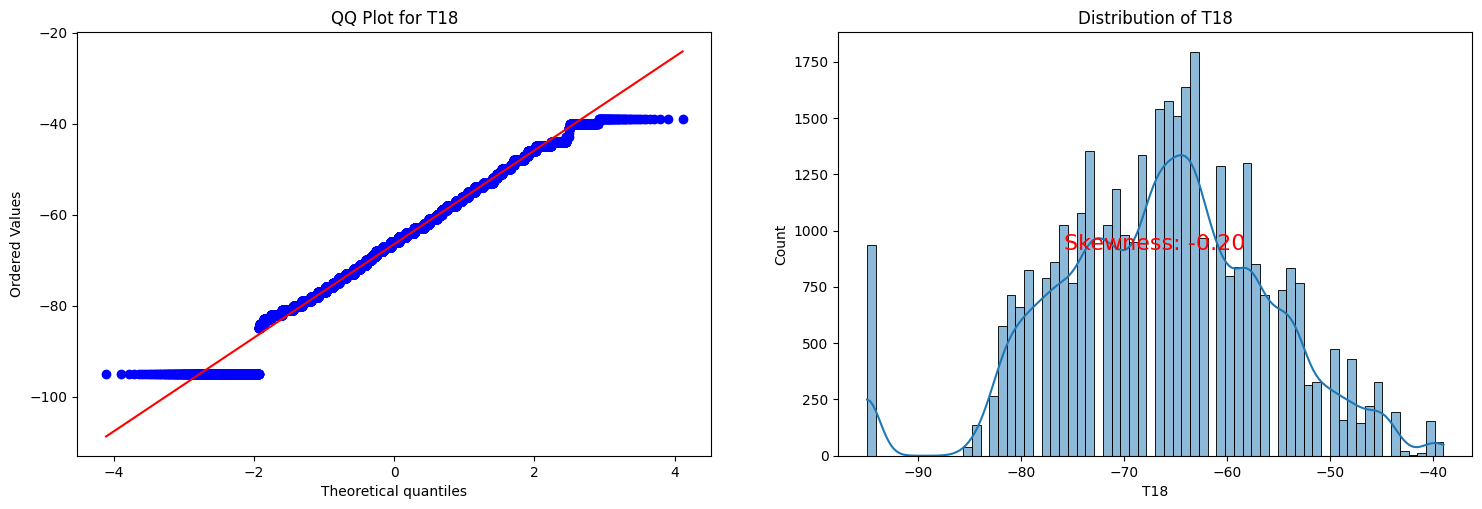

In [20]:
import scipy.stats as stats  
def qq_plot_with_skewness(data, quantitative_var):
    # Check if the variable is present in the DataFrame
    if quantitative_var not in data.columns:
        print(f"Error: '{quantitative_var}' not found in the DataFrame.")
        return
    
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    # Check for missing values
    if data[quantitative_var].isnull().any():
        print(f"Warning: '{quantitative_var}' contains missing values. Results may be affected.")

    # QQ plot
    stats.probplot(data[quantitative_var], plot=ax[0], fit=True)
    ax[0].set_title(f'QQ Plot for {quantitative_var}')

    # Skewness plot
    sns.histplot(data[quantitative_var], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {quantitative_var}')

    # Calculate skewness value
    skewness_value = stats.skew(data[quantitative_var])

    # Display skewness value on the plot
    ax[1].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}', transform=ax[1].transAxes, 
               horizontalalignment='center', verticalalignment='center', fontsize=16, color='red')

    plt.show()
# Example usage for each continuous variable
for var in continuous_vars:
    qq_plot_with_skewness(train_data, var)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔍OUTLIERS CHECK BY BOX PLOT🔍</div>

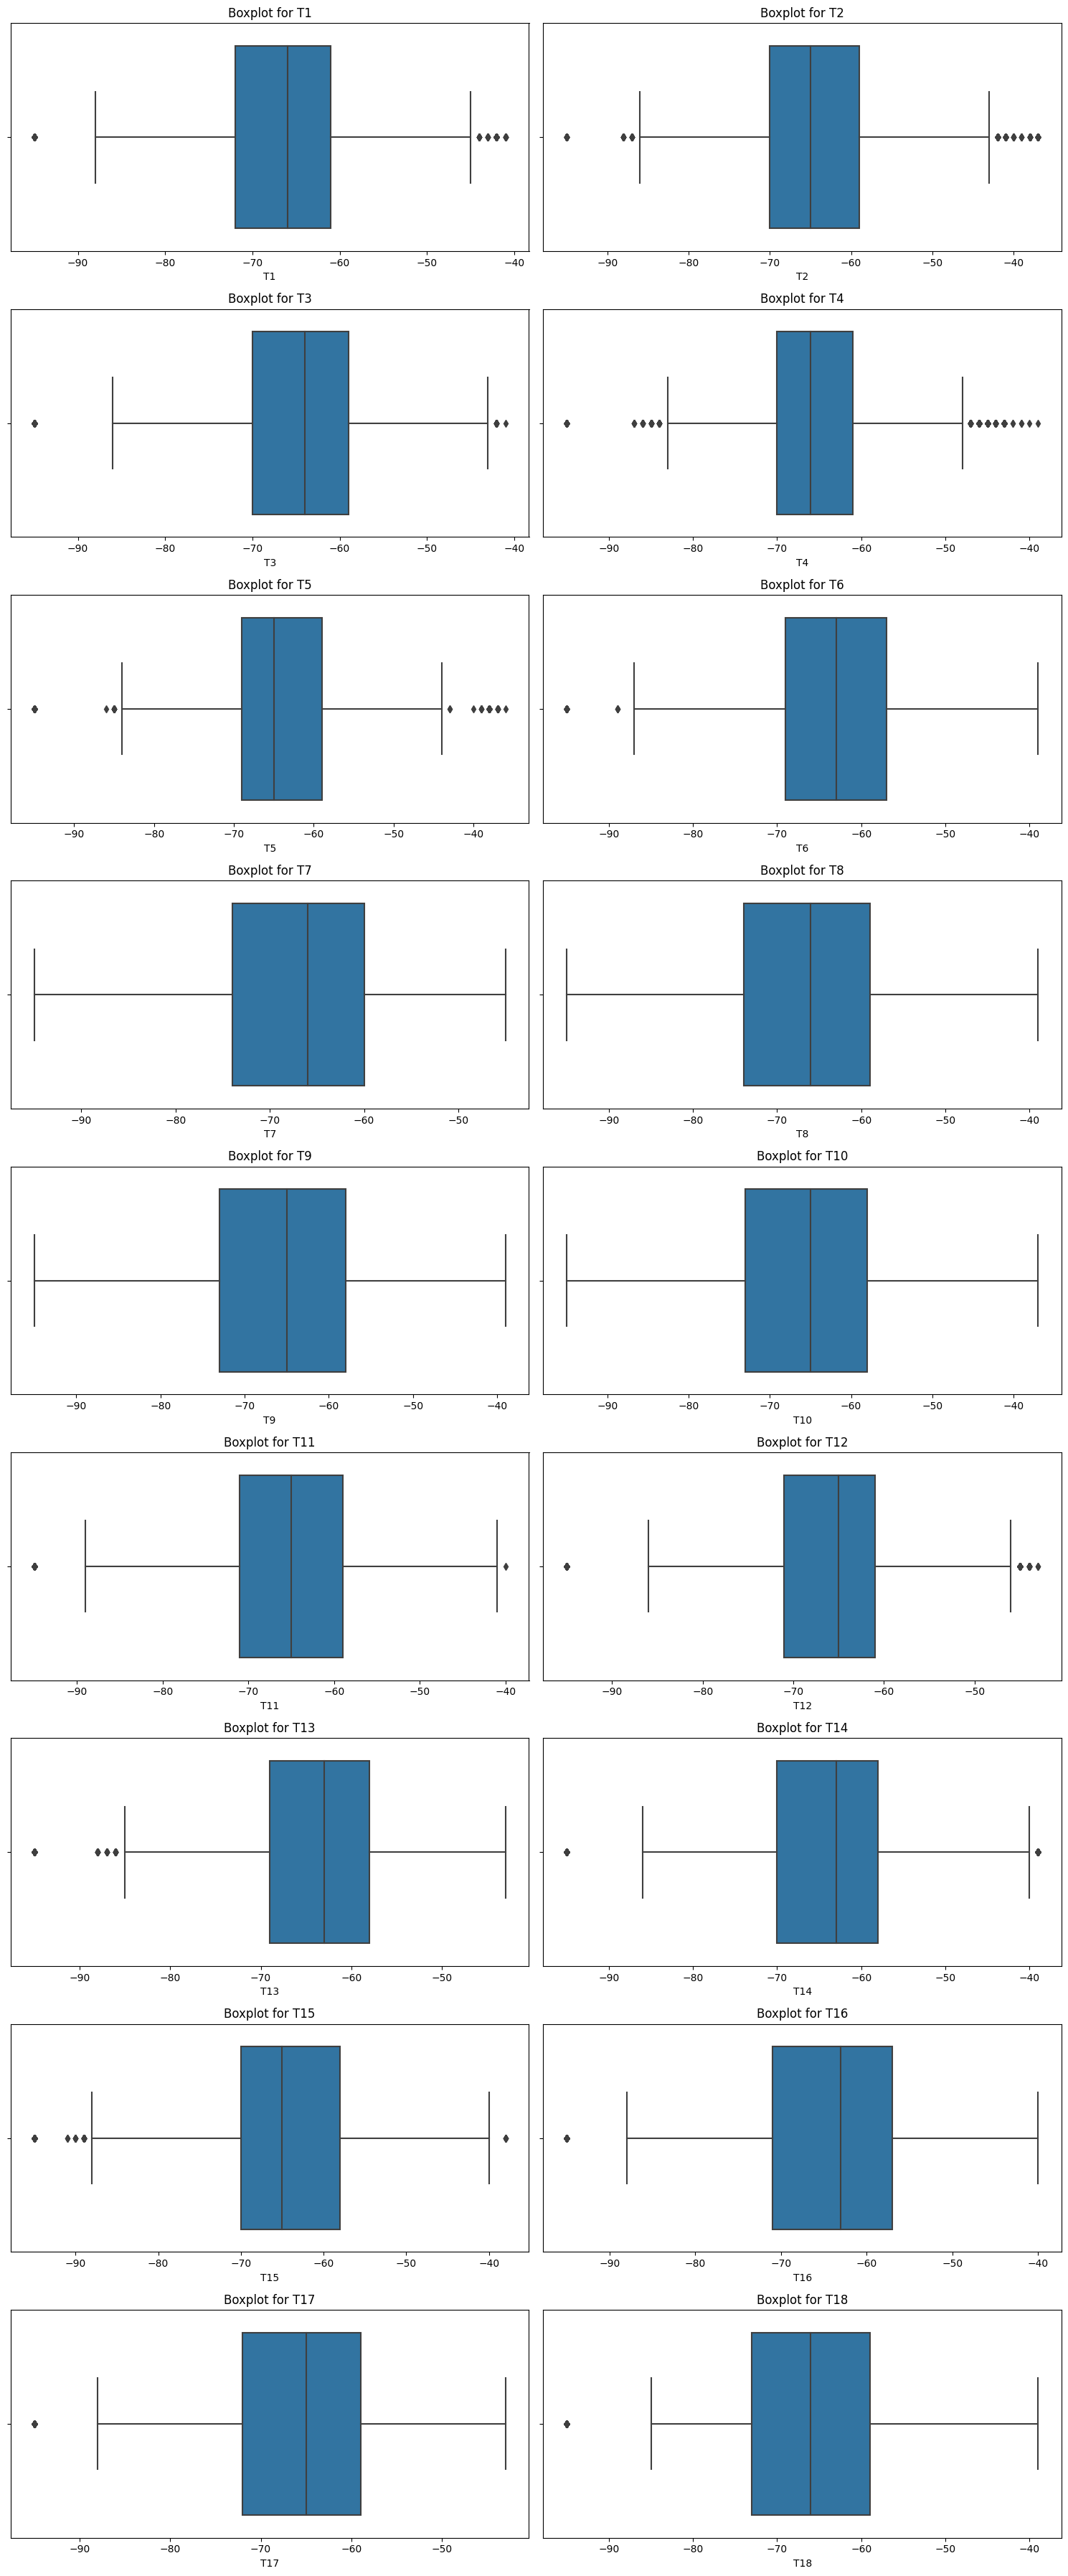

In [21]:
def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]

        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype
            sns.countplot(x=column, data=data, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            sns.boxplot(x=column, data=data, ax=ax)
            ax.set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

plot_boxplots(train_data, continuous_vars)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🎇REMOVING THE OUTLIERS🎇</div>

In [22]:
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

train_data = remove_outliers_replace(train_data, continuous_vars)
test_data = remove_outliers_replace(test_data, continuous_vars)

In [23]:
"""def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]

        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype
            sns.countplot(x=column, data=data, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            sns.boxplot(x=column, data=data, ax=ax)
            ax.set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

plot_boxplots(train_data, continuous_vars)"""

"def plot_boxplots(data, columns, ncols=2):\n    nrows = (len(columns) + ncols - 1) // ncols\n    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))\n\n    for i, column in enumerate(columns):\n        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]\n\n        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype\n            sns.countplot(x=column, data=data, ax=ax)\n            ax.set_title(f'Countplot for {column}')\n        else:\n            sns.boxplot(x=column, data=data, ax=ax)\n            ax.set_title(f'Boxplot for {column}')\n\n    plt.tight_layout()\n    plt.show()\n\nplot_boxplots(train_data, continuous_vars)"

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Dividing the independent and dependent columns seperately</div>

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to a single categorical column
train_data['target_encoded'] = label_encoder.fit_transform(train_data['target'])

In [25]:
#train_data.drop(columns='target',inplace = True)

In [26]:
X = train_data.drop(columns=['target_encoded','target'], axis=1)
y = train_data['target_encoded']

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠Data Scaling🛠</div>

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
Y_scaled = scaler.fit_transform(test_data)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Clustering🔥</div>

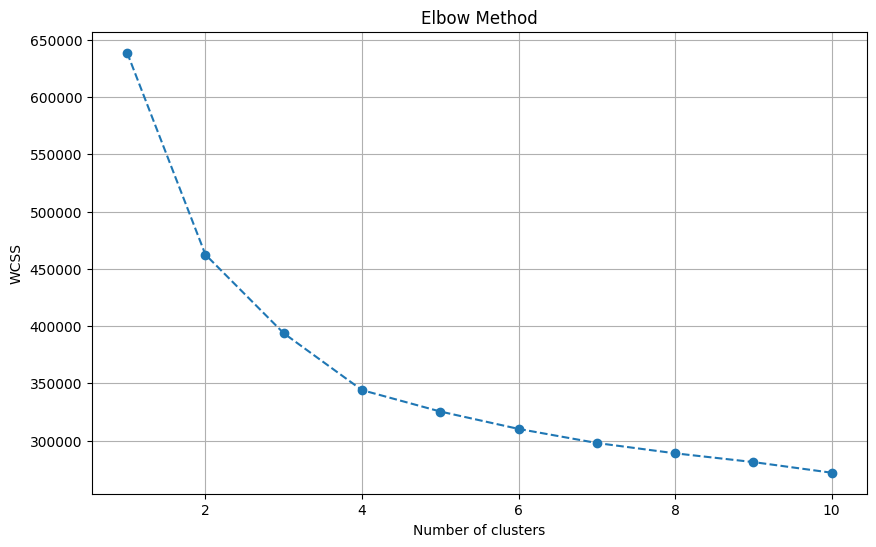

In [29]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

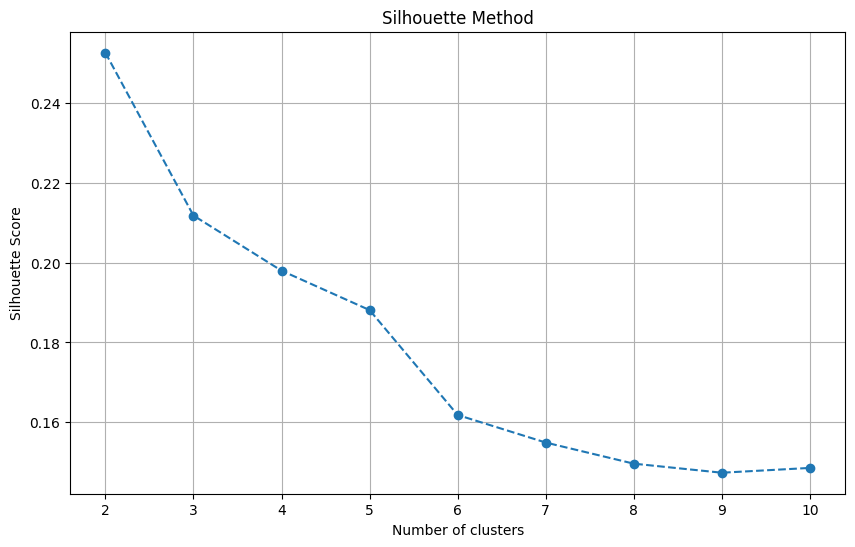

In [30]:
# Determine the optimal number of clusters using the Silhouette Method
silhouette_scores = []
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [31]:
def elbow_point(wcss):
    """
    Find the elbow point from the list of within-cluster sum of squares (WCSS) values.
    """
    deltas = [wcss[i] - wcss[i + 1] for i in range(len(wcss) - 1)]
    return deltas.index(max(deltas)) + 1  

In [32]:
# Extract the optimal number of clusters from the Elbow Method
elbow_optimal_clusters = elbow_point(wcss)
print("Optimal number of clusters (Elbow Method):", elbow_optimal_clusters)

# Extract the optimal number of clusters from the Silhouette Method
silhouette_optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters (Silhouette Method):", silhouette_optimal_clusters)

Optimal number of clusters (Elbow Method): 1
Optimal number of clusters (Silhouette Method): 2


In [33]:
optimal_clusters = min(elbow_optimal_clusters, silhouette_optimal_clusters)

In [34]:
#optimal_clusters = 4

In [35]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=1, random_state=42)

In [36]:
clusters = kmeans.predict(X_scaled)

In [37]:
train_data['Cluster'] = clusters

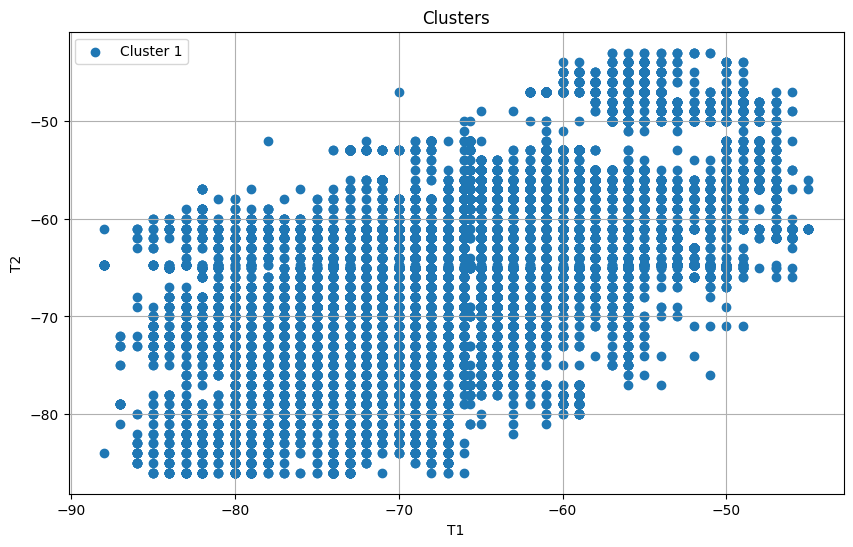

In [38]:
# Plot the clusters using the first two columns as features
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = train_data[train_data['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster + 1}')

plt.title('Clusters')
plt.xlabel(train_data.columns[0])  
plt.ylabel(train_data.columns[1])  
plt.legend()
plt.grid(True)
plt.show()

In [39]:
print("Cluster data columns are:",cluster_data.columns)

Cluster data columns are: Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target',
       'target_encoded', 'Cluster'],
      dtype='object')


In [40]:
# Assign cluster labels to the original data
train_data['Cluster'] = kmeans.labels_

In [41]:
# Function to classify a new data point
def classify_new_point(new_point):
    new_point_scaled = scaler.transform([new_point])
    cluster = kmeans.predict(new_point_scaled)
    return cluster[0]

In [42]:
new_data_point = [-1.26609695, -2.18753632, -0.74022886, -0.05344765,  0.06017375,
       -1.04987638,  0.32616787, -0.23832541,  0.53095939, -1.01418655,
       -1.96270317, -1.46261002, -2.22088796, -1.98578267, -2.02874303,
       -0.71647747,  0.58627792,  0.65475827]  
cluster = classify_new_point(new_data_point)

In [43]:
print("Cluster are:",cluster)

Cluster are: 0


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥ML Model Training🔥</div>

In [44]:
target_value_counts = train_data['target'].value_counts()
total_classes = len(target_value_counts)
print("Total number of different classes in target column:", total_classes)

Total number of different classes in target column: 160


In [45]:
train_data.sample(5)

T1    T2    T3    T4    T5    T6    T7    T8    T9   T10  ...   T12  \
29576 -52.0 -58.0 -50.0 -53.0 -71.0 -58.0 -66.0 -71.0 -67.0 -57.0  ... -54.0   
12688 -62.0 -57.0 -56.0 -53.0 -48.0 -61.0 -76.0 -65.0 -67.0 -73.0  ... -61.0   
30273 -68.0 -64.0 -68.0 -68.0 -62.0 -67.0 -67.0 -59.0 -62.0 -78.0  ... -70.0   
7418  -70.0 -73.0 -74.0 -73.0 -62.0 -81.0 -59.0 -58.0 -61.0 -73.0  ... -69.0   
21799 -71.0 -74.0 -72.0 -81.0 -68.0 -66.0 -57.0 -54.0 -61.0 -72.0  ... -81.0   

        T13   T14   T15   T16   T17   T18  target target_encoded  Cluster  
29576 -61.0 -64.0 -65.0 -60.0 -79.0 -71.0     B12             83        0  
12688 -57.0 -57.0 -62.0 -64.0 -65.0 -68.0     B29            101        0  
30273 -68.0 -65.0 -69.0 -60.0 -55.0 -55.0     B57            132        0  
7418  -71.0 -65.0 -76.0 -55.0 -66.0 -66.0     B58            133        0  
21799 -75.0 -65.0 -73.0 -62.0 -71.0 -48.0     B70            147        0  

[5 rows x 21 columns]

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🤝CORRELATION🤝</div>

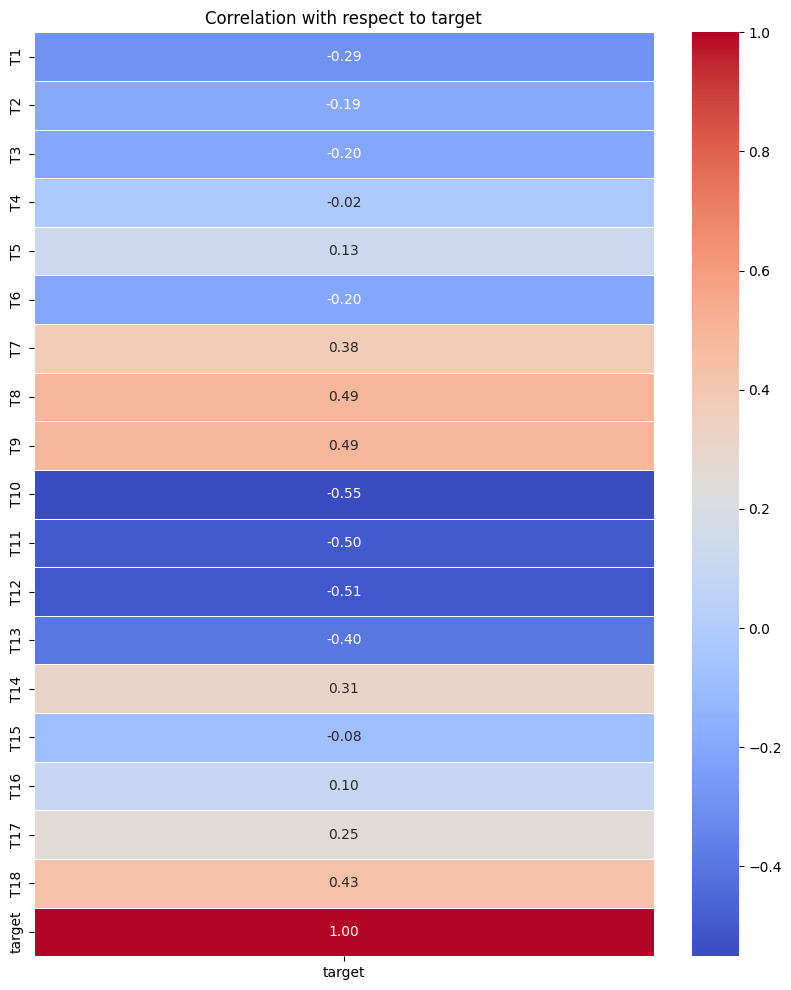

In [46]:
merged_data = pd.concat([X, y.rename('target')], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix[['target']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with respect to target')
plt.show()

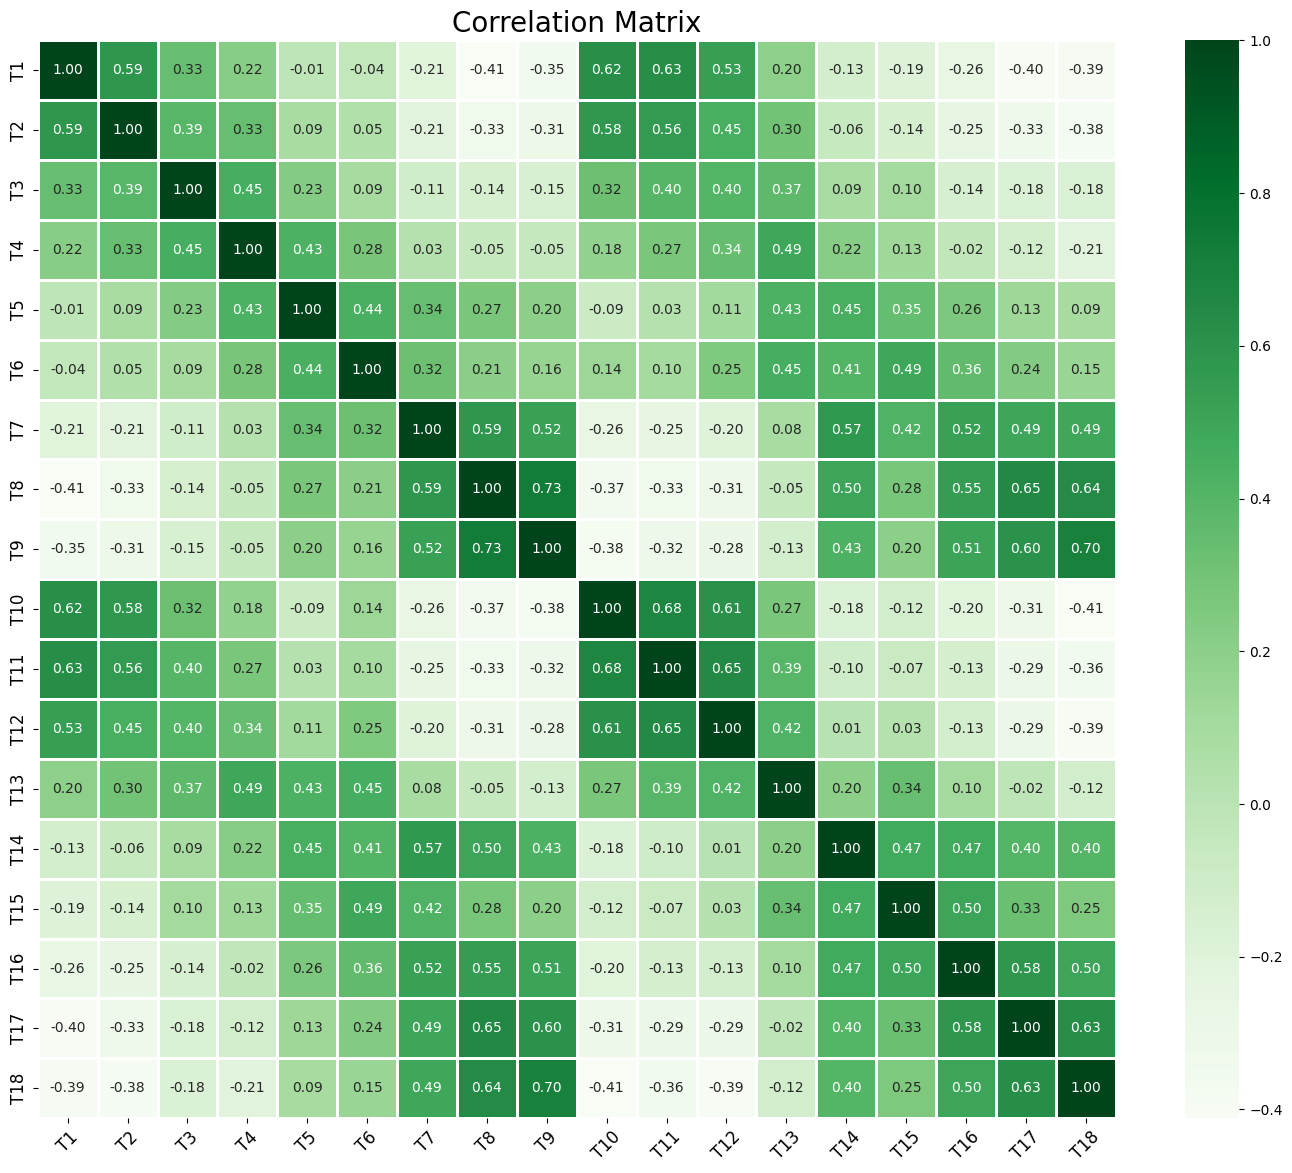

In [47]:
correlation_matrix = X.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(18, 14))  # Increase the width and height as needed

# Plot the correlation matrix as a heatmap with larger boxes
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=1, square=True)

# Customize plot
plt.title('Correlation Matrix', fontsize=20)  # Increase the font size of the title
plt.xticks(fontsize=12)  # Increase the font size of x-axis labels
plt.yticks(fontsize=12)  # Increase the font size of y-axis labels

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the aspect ratio to prevent distortion of cell shapes
heatmap.set_aspect('equal')

plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Train-Test-Split🔥</div>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥ML Models🔥</div>

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Model-1 (LogisticRegression)🔥</div>

In [49]:
Logistic_model = LogisticRegression(max_iter = 1000)

In [50]:
Logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

The `LogisticRegression` model with the `max_iter` parameter set to 1000 is commonly chosen for several reasons:

1. **Convergence**: Setting `max_iter` to a higher value ensures that the optimization algorithm has sufficient iterations to converge to a solution. Logistic regression uses iterative optimization techniques like gradient descent to find the optimal coefficients, and increasing `max_iter` helps ensure that the algorithm converges to a stable solution.

2. **Complexity of Data**: For complex datasets or datasets with a large number of features, more iterations may be needed for the optimization algorithm to converge. Setting `max_iter` to a higher value accommodates these scenarios.

3. **Preventing Early Stopping**: Early stopping occurs when the optimization algorithm terminates before convergence due to reaching the maximum number of iterations. By setting `max_iter` to a sufficiently high value, we can prevent premature termination and allow the algorithm to converge to a better solution.

4. **Trade-off with Computational Cost**: While increasing `max_iter` can improve the likelihood of convergence, it also increases the computational cost, particularly for large datasets or high-dimensional feature spaces. Therefore, the choice of `max_iter` involves a trade-off between computational resources and convergence reliability.

In summary, setting `max_iter` to 1000 in `LogisticRegression` helps ensure convergence of the optimization algorithm and improves the model's robustness, especially for datasets with complex patterns or high-dimensional feature spaces.

In [51]:
y_pred = Logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression is:", accuracy*100,"%")

Accuracy of Logistic Regression is: 97.43553614203184 %


In [52]:
test_pred = Logistic_model.predict(Y_scaled)

In [53]:
# Inverse transform the label encoded predictions
test_pred_inverse = label_encoder.inverse_transform(test_pred)

# Create a DataFrame for the inverse transformed predictions
inverse_df = pd.DataFrame({'Original_Target': test_pred_inverse})

# Save the DataFrame to an Excel file
inverse_df.to_excel('Logistic_predictions.xlsx', index=False)

print("Inverse transformed predictions saved to Logistic_predictions.xlsx")

Inverse transformed predictions saved to Logistic_predictions.xlsx


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Model-2 (XGBoost)🔥</div>

In [54]:
# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBoost (Extreme Gradient Boosting) is a popular and powerful machine learning algorithm that is widely used in both industry and academia for various reasons:

1. **High Performance**: XGBoost is known for its speed and performance. It is highly optimized and can handle large datasets efficiently. The algorithm implements parallelized tree boosting, which allows for faster computation and scalability.

2. **Regularization**: XGBoost includes built-in regularization techniques to prevent overfitting, such as L1 (Lasso) and L2 (Ridge) regularization. These regularization terms help improve the model's generalization ability and prevent it from memorizing the training data.

3. **Flexibility**: XGBoost can be used for both regression and classification tasks, making it a versatile algorithm. It supports various objective functions and evaluation metrics, allowing users to customize the model according to their specific needs.

4. **Feature Importance**: XGBoost provides insights into feature importance, allowing users to understand which features are most influential in making predictions. This information can be valuable for feature selection and understanding the underlying patterns in the data.

5. **Handling Missing Values**: XGBoost can handle missing values internally, eliminating the need for preprocessing steps such as imputation or removal of missing data.

6. **Wide Adoption**: XGBoost has been widely adopted in machine learning competitions on platforms like Kaggle, where it has consistently been a top performer. Its popularity and success in real-world applications demonstrate its effectiveness.

Overall, the combination of speed, performance, flexibility, and regularization capabilities makes XGBoost a preferred choice for many machine learning tasks, including classification problems.

In [55]:
y_pred_xg = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy of XGBoost_classifier is:", accuracy*100,"%")

Accuracy of XGBoost_classifier is: 97.90052134704806 %


In [56]:
test_pred_xg = xgb_classifier.predict(Y_scaled)

In [57]:
# Inverse transform the label encoded predictions
test_pred_inverse = label_encoder.inverse_transform(test_pred_xg)

# Create a DataFrame for the inverse transformed predictions
inverse_df = pd.DataFrame({'Original_Target': test_pred_inverse})

# Save the DataFrame to an Excel file
inverse_df.to_excel('XGBoost_predictions.xlsx', index=False)

print("Inverse transformed predictions saved to XGboost_predictions.xlsx")

Inverse transformed predictions saved to XGboost_predictions.xlsx


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Model-3 (Random Forest)🔥</div>

In [58]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest is selected for classification tasks due to several advantages:

1. **Ensemble Learning**: Random Forest is an ensemble learning method that combines multiple decision trees to improve the overall performance of the model. Each tree in the forest is trained independently on a random subset of the training data, and the final prediction is made by averaging or voting the predictions of individual trees.

2. **High Accuracy**: Random Forest typically provides high accuracy compared to single decision trees, especially for complex datasets with nonlinear relationships between features and target variables.

3. **Robust to Overfitting**: Random Forest is less prone to overfitting than individual decision trees, thanks to the randomness introduced during the training process. The randomness includes bootstrap sampling of training data and random selection of features for each tree.

4. **Feature Importance**: Random Forest can measure the importance of each feature in the classification task. This information helps in feature selection and understanding the underlying data relationships.

5. **Handles Missing Values**: Random Forest can handle missing values in the dataset without requiring imputation. It uses out-of-bag samples for training, which allows it to make predictions for samples with missing values.

6. **Robust to Outliers**: Random Forest is robust to outliers and noisy data, as it considers multiple decision trees that collectively reduce the impact of individual outliers.

7. **Parallelization**: Random Forest training can be easily parallelized, making it efficient for large datasets and scalable to multi-core architectures.

8. **Nonlinear Relationships**: Random Forest can capture nonlinear relationships between features and target variables, making it suitable for a wide range of classification tasks.

Overall, Random Forest is a versatile and powerful classification algorithm that offers high accuracy, robustness, and interpretability, making it a popular choice for various machine learning tasks.

In [59]:
y_pred_rf = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy of RandomForest_classifier is:", accuracy*100,"%")

Accuracy of RandomForest_classifier is: 98.64731576722559 %


In [60]:
test_pred_rf = random_forest.predict(Y_scaled)

In [61]:
# Inverse transform the label encoded predictions
test_pred_inverse = label_encoder.inverse_transform(test_pred_rf)

# Create a DataFrame for the inverse transformed predictions
inverse_df = pd.DataFrame({'Original_Target': test_pred_inverse})

# Save the DataFrame to an Excel file
inverse_df.to_excel('RandomForest_predictions.xlsx', index=False)

print("Inverse transformed predictions saved to RandomForest_predictions.xlsx")

Inverse transformed predictions saved to RandomForest_predictions.xlsx


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Model-4 (Support vector)🔥</div>

In [62]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Support Vector Machines (SVMs) are chosen for classification tasks due to several reasons:

1. **Effective in high-dimensional spaces**: SVMs perform well in high-dimensional spaces, making them suitable for problems with many features, such as text classification or image recognition.

2. **Memory efficient**: SVMs use a subset of training points in the decision function (called support vectors), making them memory efficient, especially for large datasets.

3. **Versatile kernels**: SVMs can use different kernel functions to adapt to various types of data. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

4. **Regularization parameter**: SVMs have a regularization parameter (C), which helps prevent overfitting by balancing the trade-off between maximizing the margin and minimizing the classification error.

5. **Global optimal solution**: SVMs find the optimal separating hyperplane that maximizes the margin between classes, resulting in a global optimal solution.

6. **Effective in non-linear classification**: SVMs can handle non-linear decision boundaries by using kernel tricks to map the input space into a higher-dimensional feature space where a linear separation is possible.

7. **Robust to outliers**: SVMs are less sensitive to outliers compared to other classification algorithms like logistic regression.

Overall, SVMs are a powerful and flexible classification algorithm that can handle a wide range of datasets and provide robust performance in various scenarios.

In [63]:
y_pred_sv = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_sv)
print("Accuracy of SupportVector_classifier is:", accuracy*100,"%")

Accuracy of SupportVector_classifier is: 98.30914470903198 %


In [64]:
test_pred_sv = svm_classifier.predict(Y_scaled)

In [65]:
# Inverse transform the label encoded predictions
test_pred_inverse = label_encoder.inverse_transform(test_pred_sv)

# Create a DataFrame for the inverse transformed predictions
inverse_df = pd.DataFrame({'Original_Target': test_pred_inverse})

# Save the DataFrame to an Excel file
inverse_df.to_excel('SupportVector_predictions.xlsx', index=False)

print("Inverse transformed predictions saved to SupportVector_predictions.xlsx")

Inverse transformed predictions saved to SupportVector_predictions.xlsx


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Model-5 (Decision Tree)🔥</div>

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Trees are chosen for classification tasks for several reasons:

1. **Interpretability**: Decision Trees are easy to interpret and understand, making them suitable for scenarios where interpretability of the model is important. The model's decision-making process is represented as a tree structure, which can be visualized and understood by non-experts.

2. **Non-linearity**: Decision Trees can capture non-linear relationships between features and the target variable. They partition the feature space into regions based on feature values, allowing for complex decision boundaries.

3. **Robustness to outliers**: Decision Trees are robust to outliers and missing values in the data. They do not require preprocessing steps like feature scaling, and they can handle both numerical and categorical data effectively.

4. **Feature importance**: Decision Trees provide a measure of feature importance, indicating which features are most influential in making predictions. This can help in feature selection and understanding the underlying patterns in the data.

5. **No assumptions about data distribution**: Decision Trees make no assumptions about the distribution of the data, unlike some other models such as linear regression. They can handle both linear and non-linear relationships between features and the target variable.

Overall, Decision Trees are versatile and intuitive models that perform well in a wide range of classification tasks.

In [67]:
y_pred_dt = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy of SupportVector_classifier is:", accuracy*100,"%")

Accuracy of SupportVector_classifier is: 96.67465126109623 %


In [68]:
test_pred_dt = dt_classifier.predict(Y_scaled)

In [69]:
# Inverse transform the label encoded predictions
test_pred_inverse = label_encoder.inverse_transform(test_pred_dt)

# Create a DataFrame for the inverse transformed predictions
inverse_df = pd.DataFrame({'Original_Target': test_pred_inverse})

# Save the DataFrame to an Excel file
inverse_df.to_excel('DecisionTree_predictions.xlsx', index=False)

print("Inverse transformed predictions saved to decisionTree_predictions.xlsx")

Inverse transformed predictions saved to decisionTree_predictions.xlsx


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥All Models Accuracy DataFrame</div>

In [70]:
accuracy_scores = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'Support Vector Machine', 'Decision Tree'],
    'Accuracy': [97.44, 97.90, 98.65, 98.31, 96.62]  
}

accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df['Accuracy'] = accuracy_df['Accuracy'].astype(str) + '%'

In [71]:
accuracy_df.style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

### * Best Model is Random Forest with the accuracy of 98.65% 

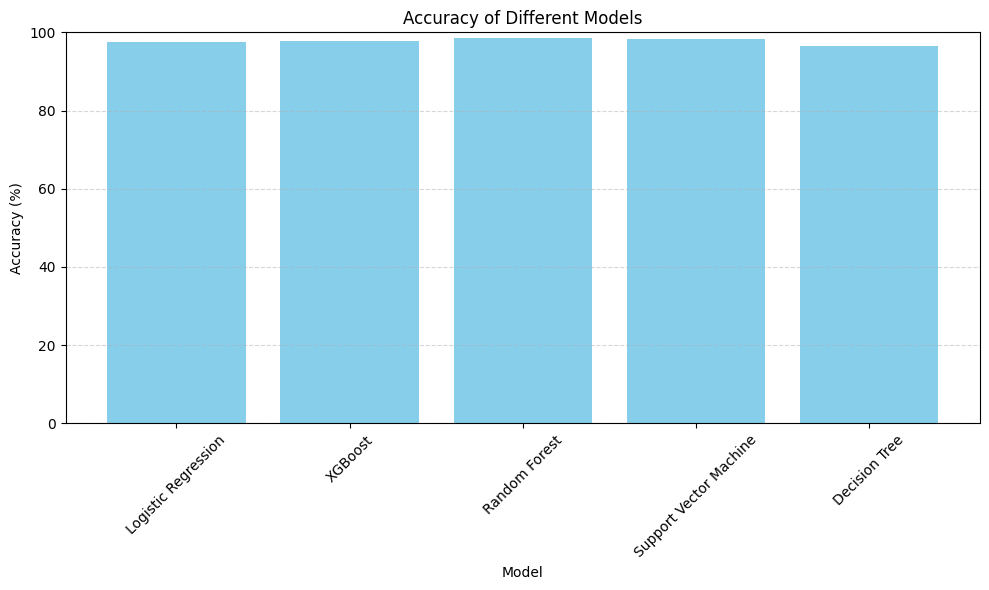

In [72]:
# Data
models = ['Logistic Regression', 'XGBoost', 'Random Forest', 'Support Vector Machine', 'Decision Tree']
accuracies = [97.44, 97.90, 98.65, 98.31, 96.62]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥Saving the Clustering and Best ML Model🔥</div>

In [73]:
import joblib
best_model = random_forest
joblib.dump(best_model, 'RandomForest_model.pkl')
print("Best model saved as RandomForest_model.pkl")

Best model saved as RandomForest_model.pkl


In [74]:
kmeans_model_filename = 'kmeans_model.pkl'

# Save the model to a file
joblib.dump(kmeans, kmeans_model_filename)

print("KMeans model saved as", kmeans_model_filename)

KMeans model saved as kmeans_model.pkl


In [75]:
scaler_model_filename = 'scaler_model.pkl'

# Save the StandardScaler object to a file
joblib.dump(scaler, scaler_model_filename)

print("StandardScaler model saved as", scaler_model_filename)

StandardScaler model saved as scaler_model.pkl
